In [2]:
%matplotlib notebook
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import generate_wfe_array, simulate_multiple_llowfs
import h5py
import scipy.io

In [93]:
#size of output images is npix_detector
# oversample pads the pupil plane before performing ffts. This gives more accurate simulations of 
# image plane interactions. oversample=2 is generally too low for this application. 
# oversample=4 works well and doesn't take too long (see notebook'Oversample Comparison')
# 'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.

oversample = 4
wavelength=632e-9*u.m
coronagraph='vortex'
npix_pupil = 512

npix_detector = 128
detector_fov = 0.3 #arcsec
detector_pixelscale = detector_fov/npix_detector
defocus = 4.45

In [94]:
highest_coeff = 15
rms_phase_mode = 20e-9

M = highest_coeff-1
wfe_array = np.zeros((M,M+1))

initial_array = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(M+1):
    wfe_array[:,i] = initial_array
    
for i in range(M):
    wfe_array[i,i+1] = wfe_array[i,i+1] + rms_phase_mode
print(wfe_array[:,:3])
    

[[0.e+00 2.e-08 0.e+00]
 [0.e+00 0.e+00 2.e-08]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]]


In [95]:
data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defocus)

In [96]:
print(np.max(data[:,:,0]))
print(np.max(data[:,:,1]))

0.0025587695273403765
0.0028160180786495834


<IPython.core.display.Javascript object>


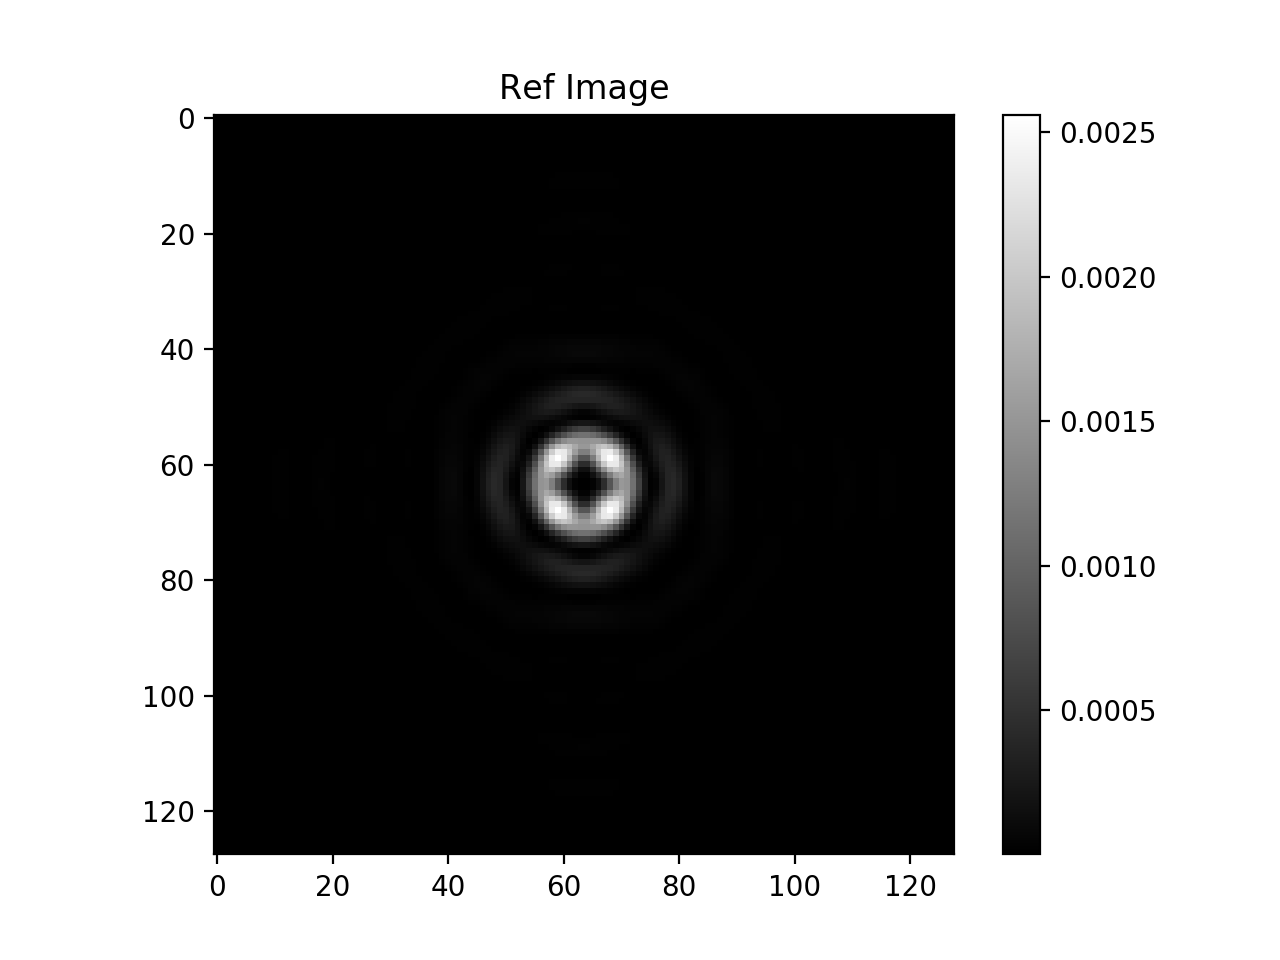

<IPython.core.display.Javascript object>


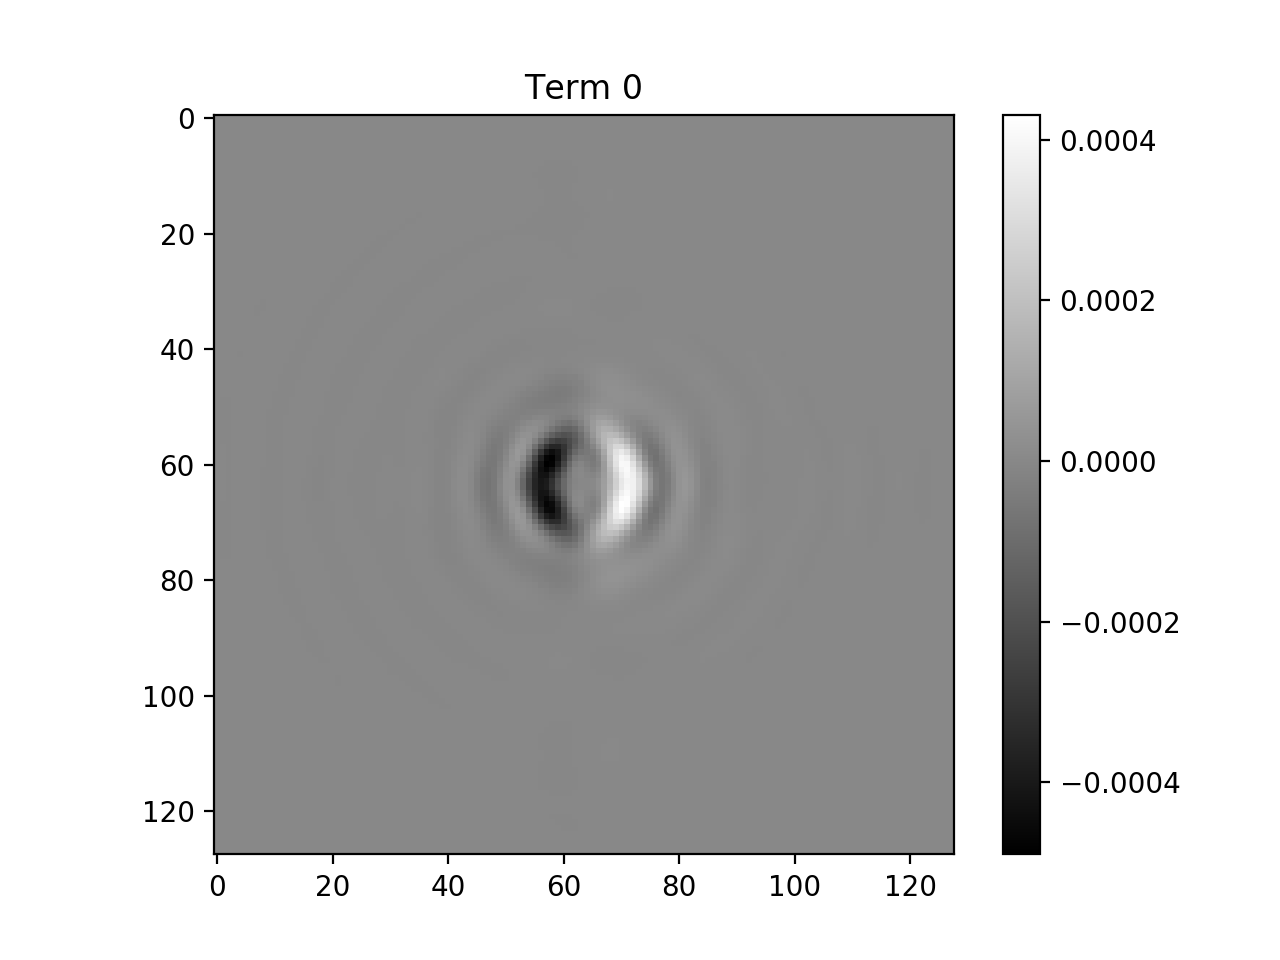

<IPython.core.display.Javascript object>


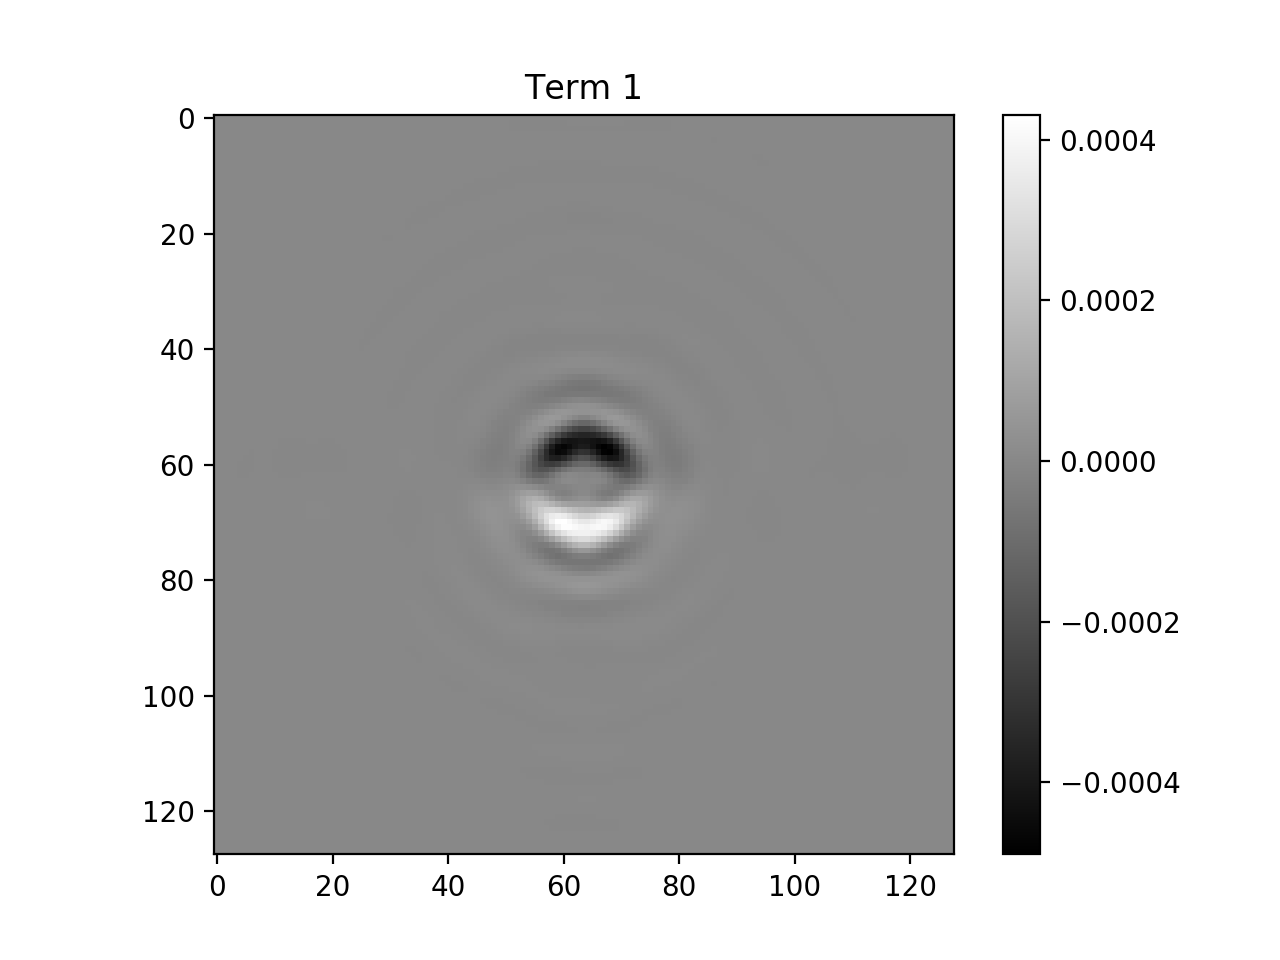

<IPython.core.display.Javascript object>


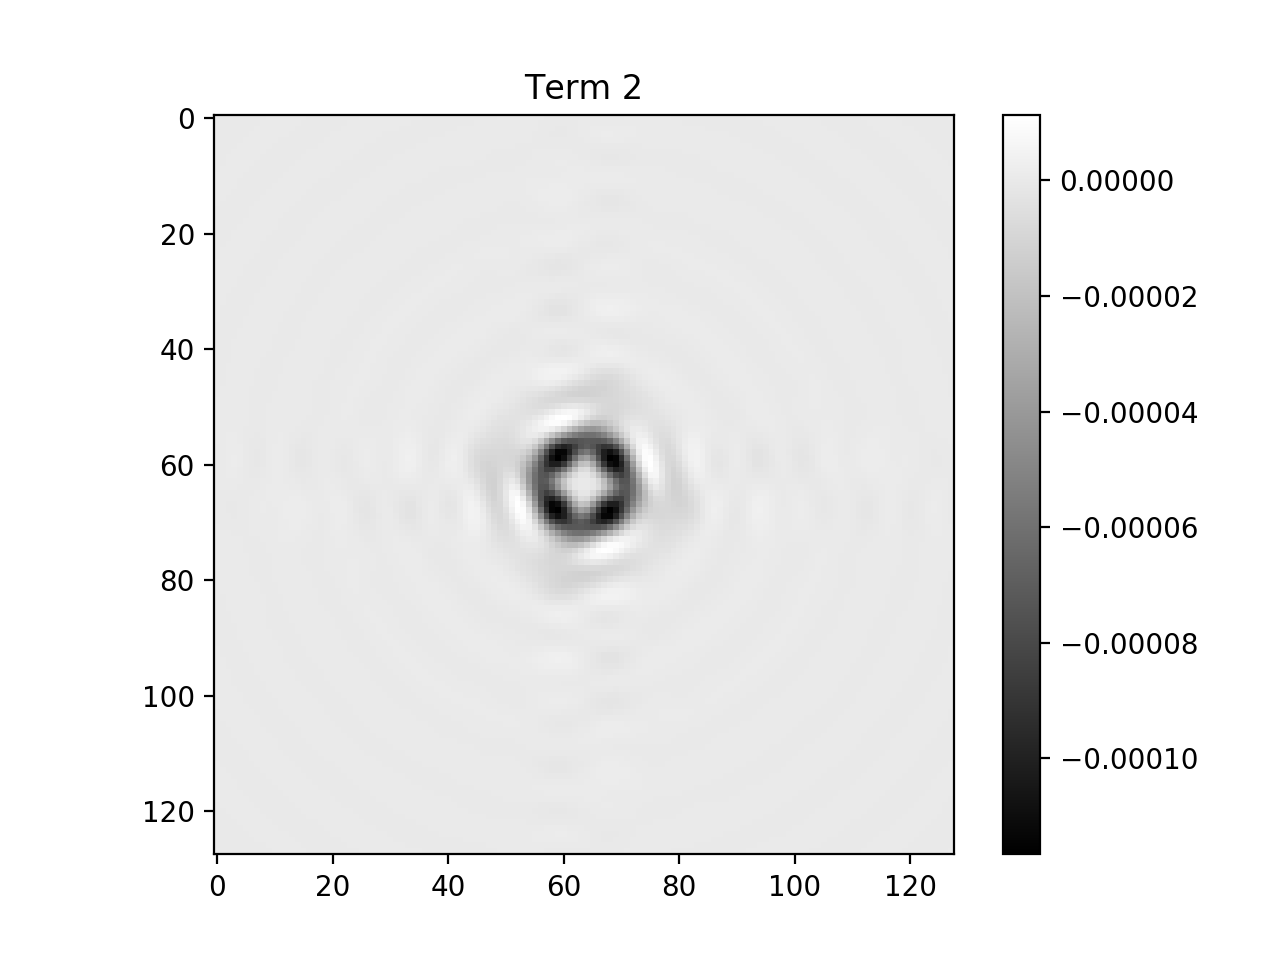

<IPython.core.display.Javascript object>


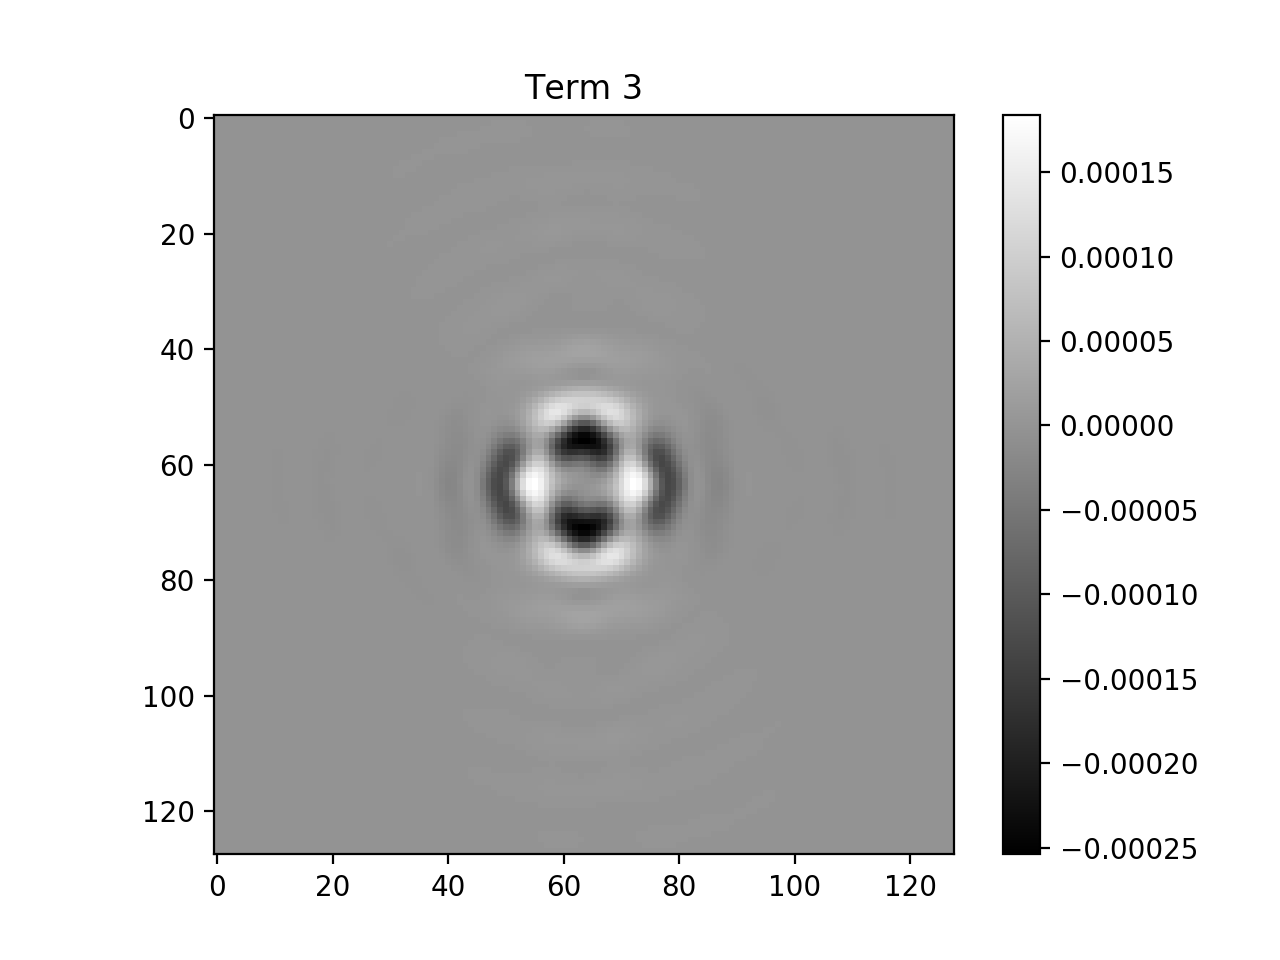

<IPython.core.display.Javascript object>


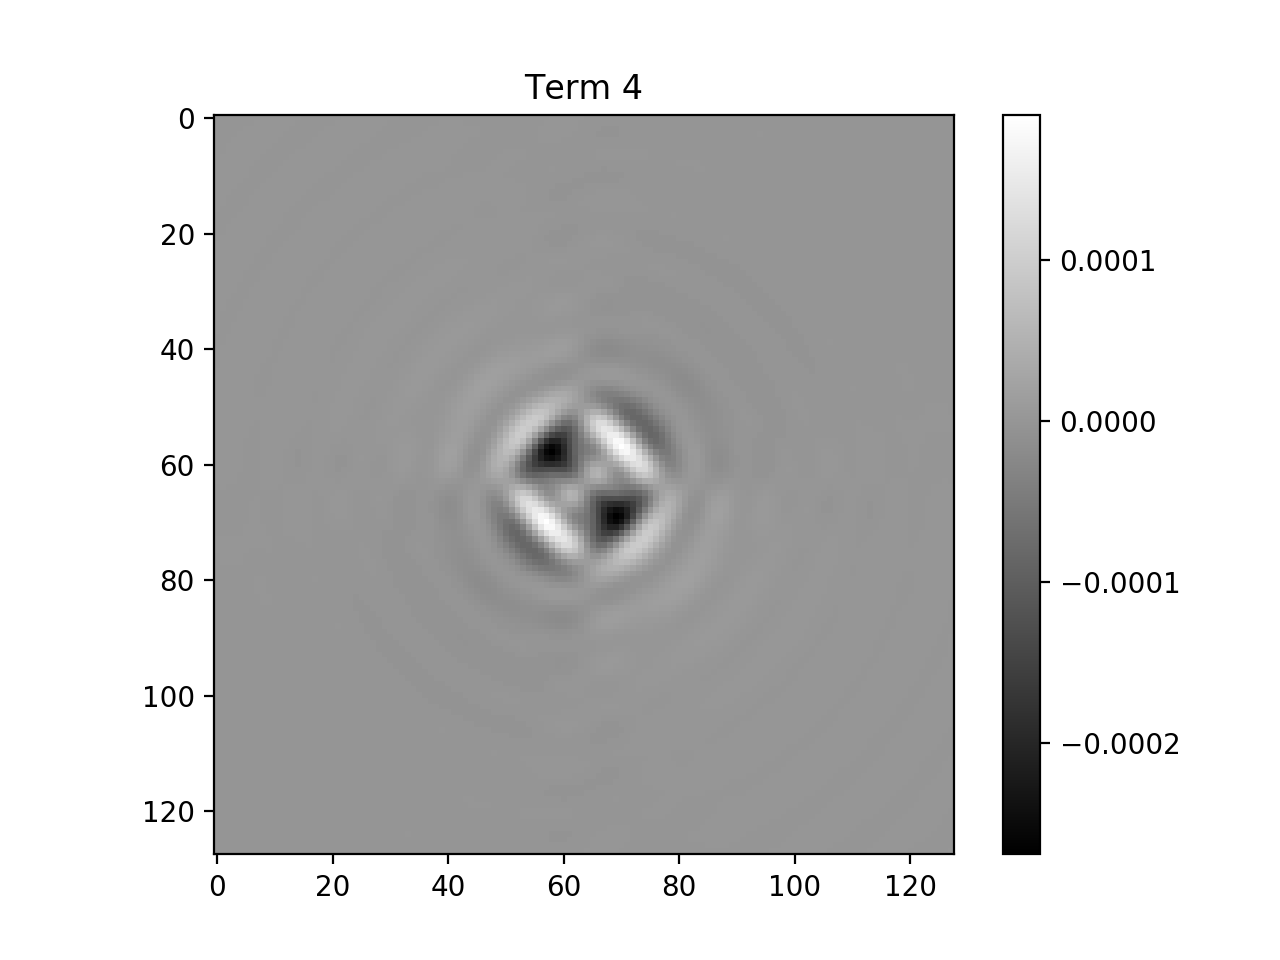

<IPython.core.display.Javascript object>


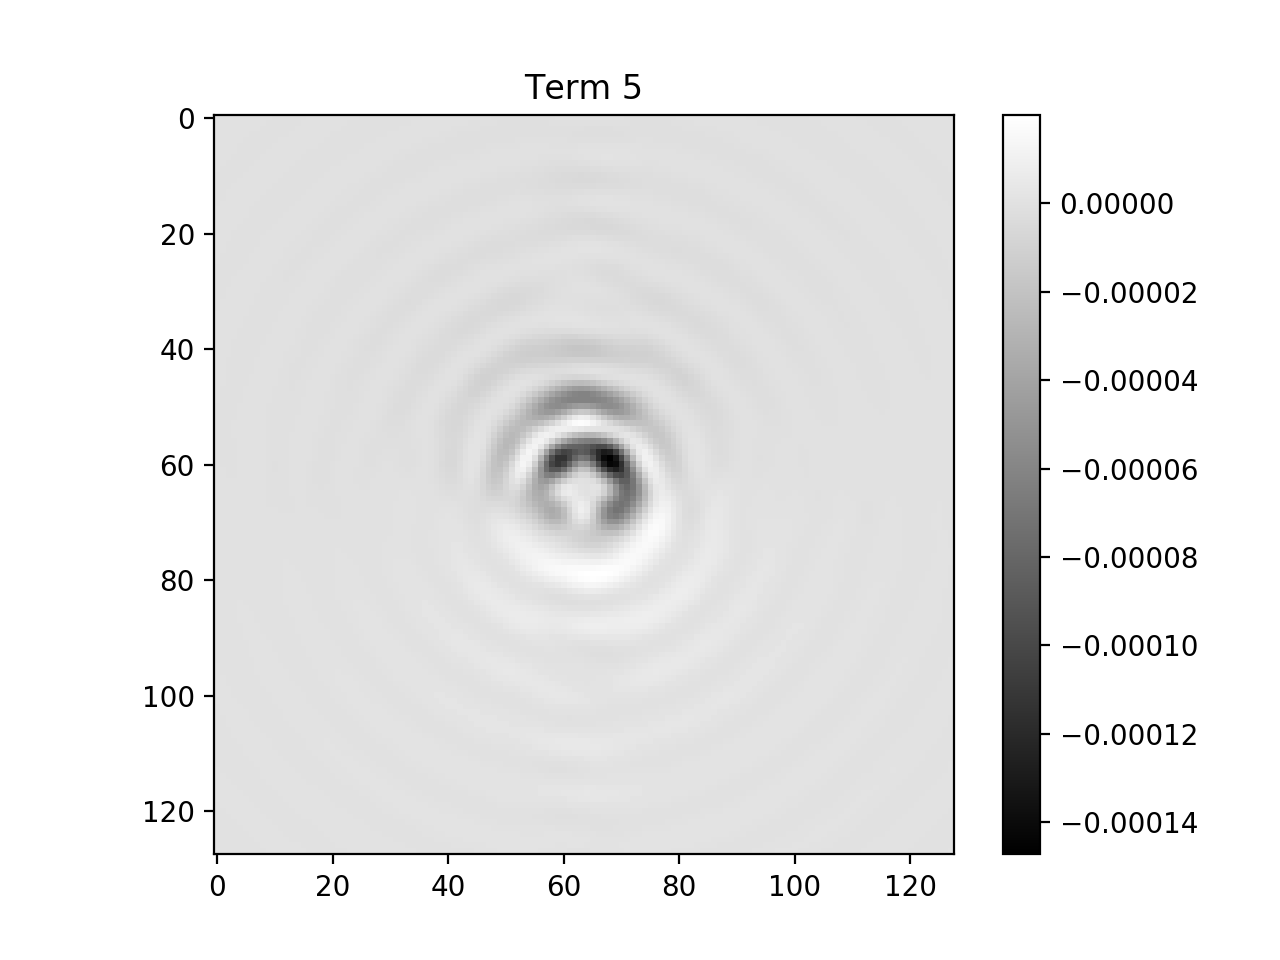

<IPython.core.display.Javascript object>


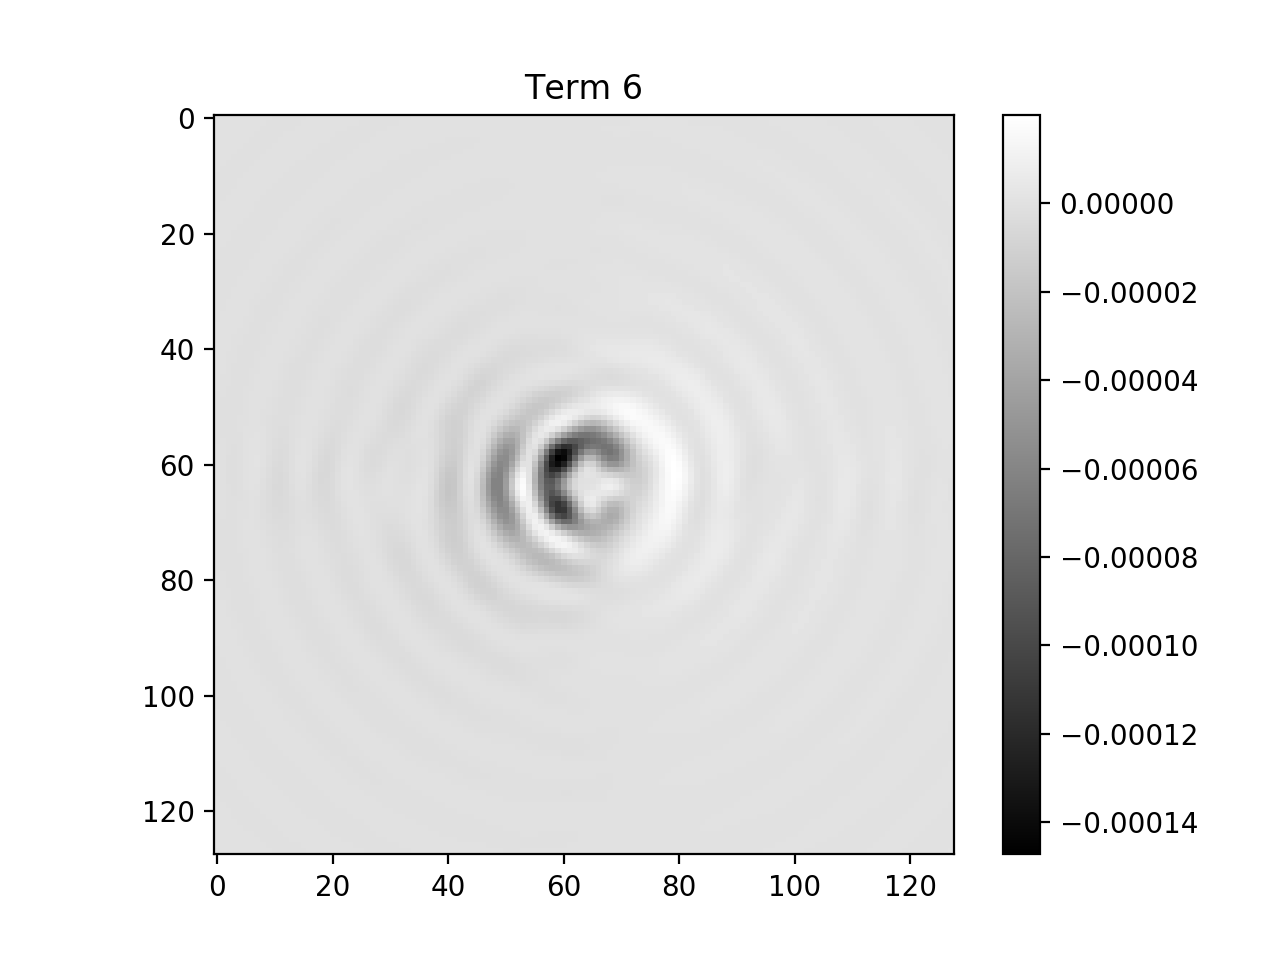

<IPython.core.display.Javascript object>


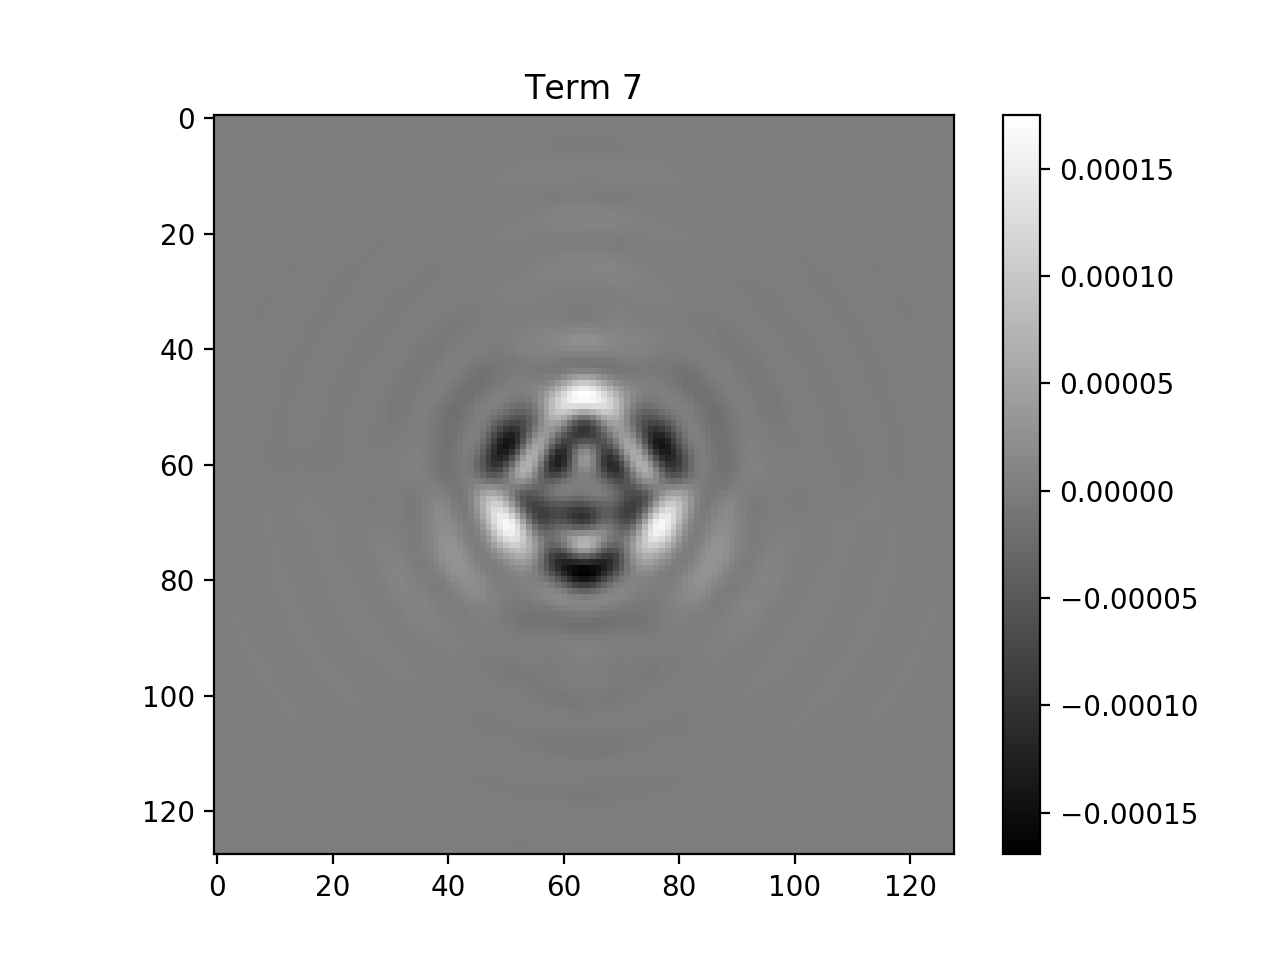

<IPython.core.display.Javascript object>


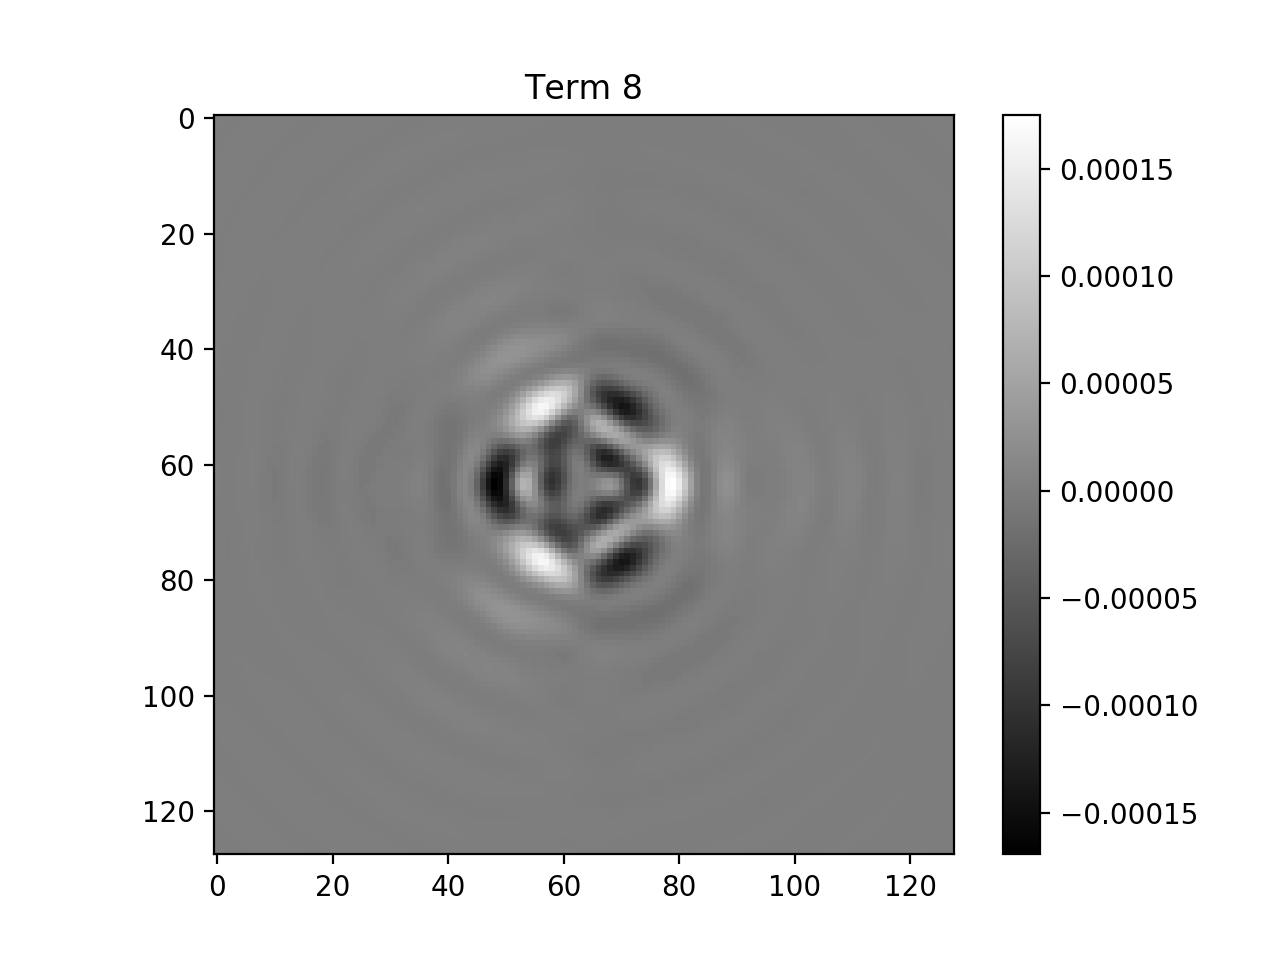

<IPython.core.display.Javascript object>


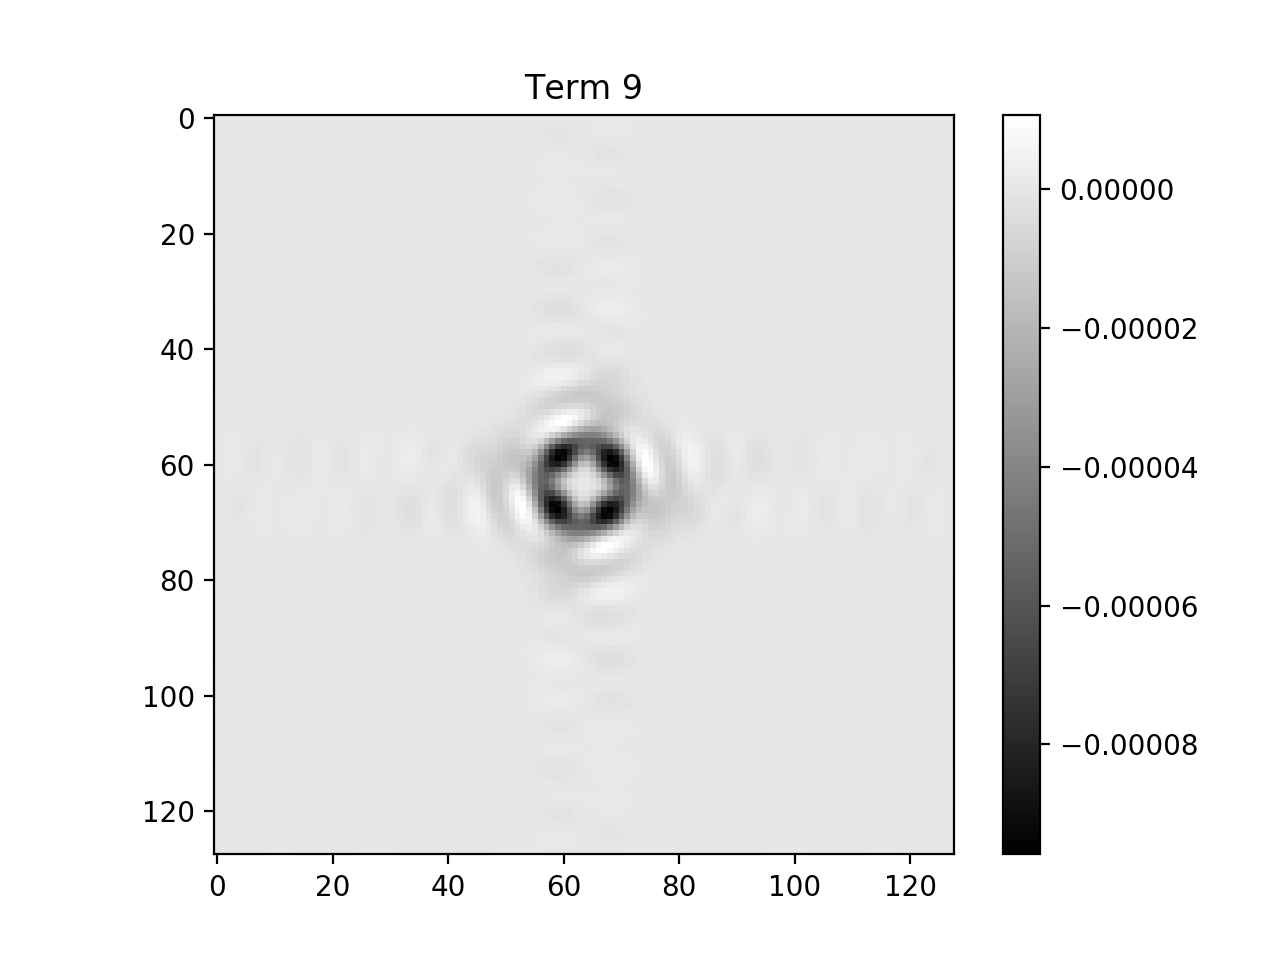

<IPython.core.display.Javascript object>


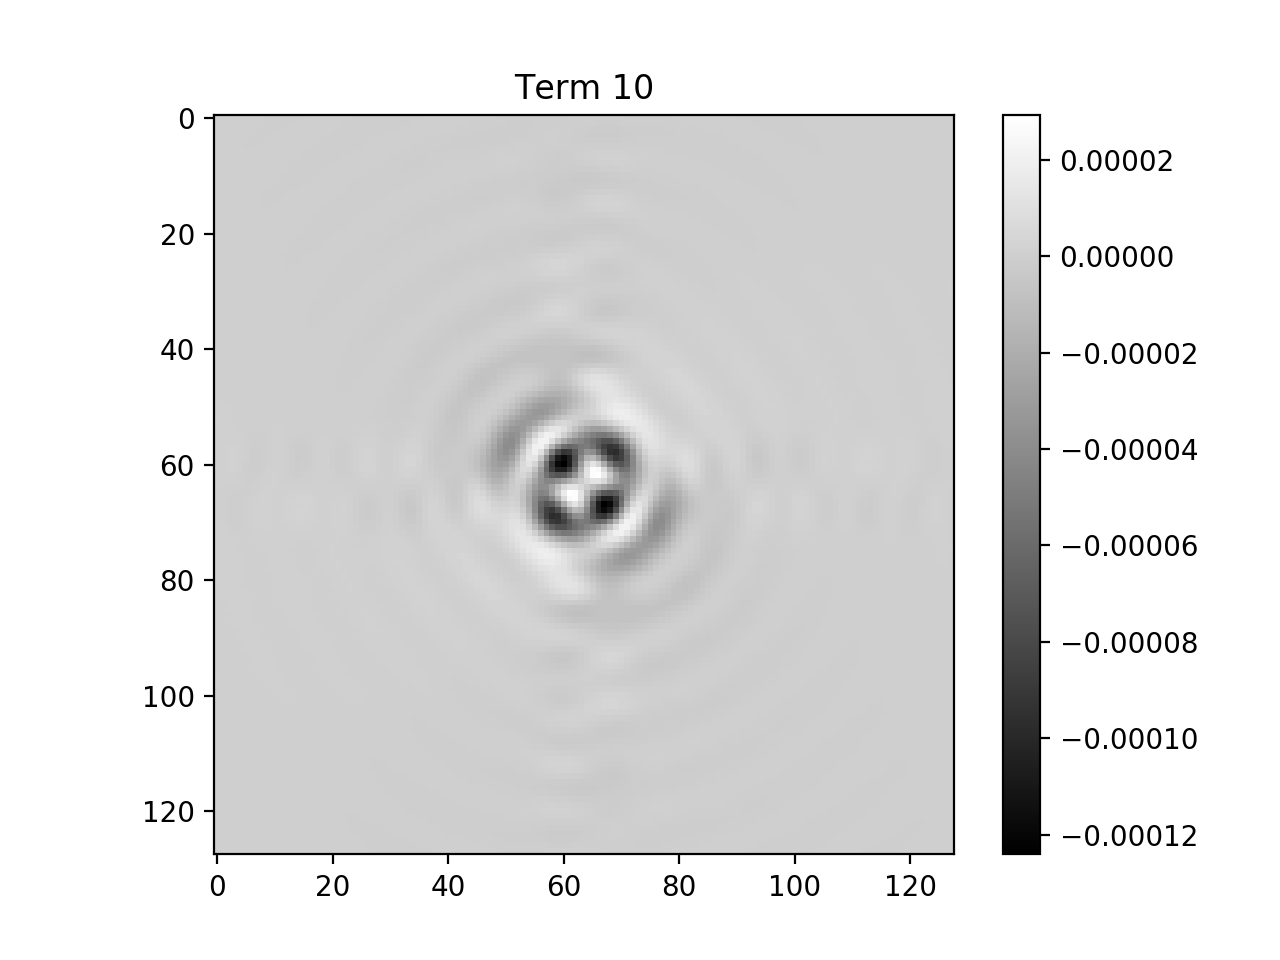

<IPython.core.display.Javascript object>


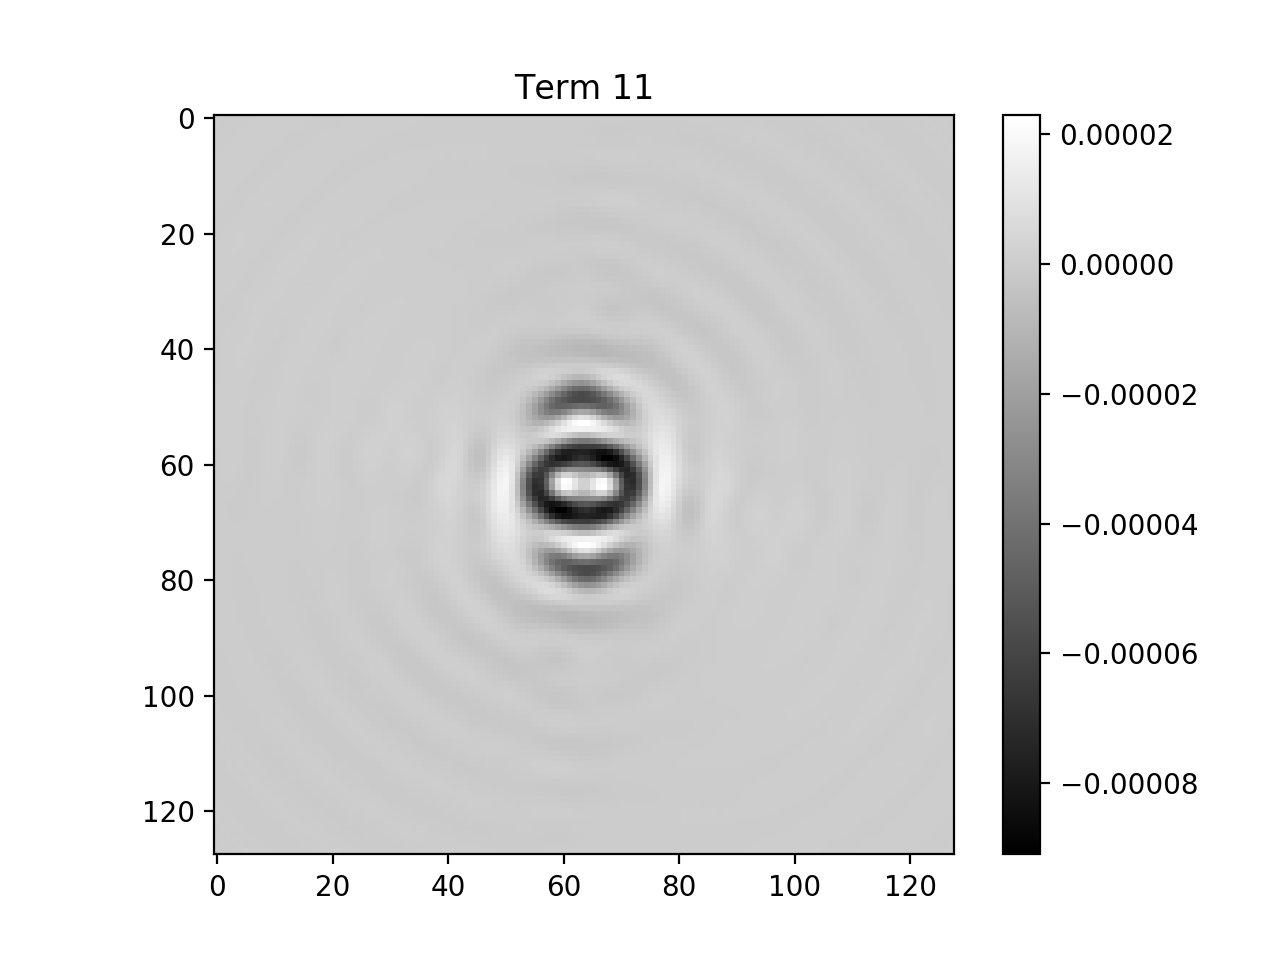

<IPython.core.display.Javascript object>


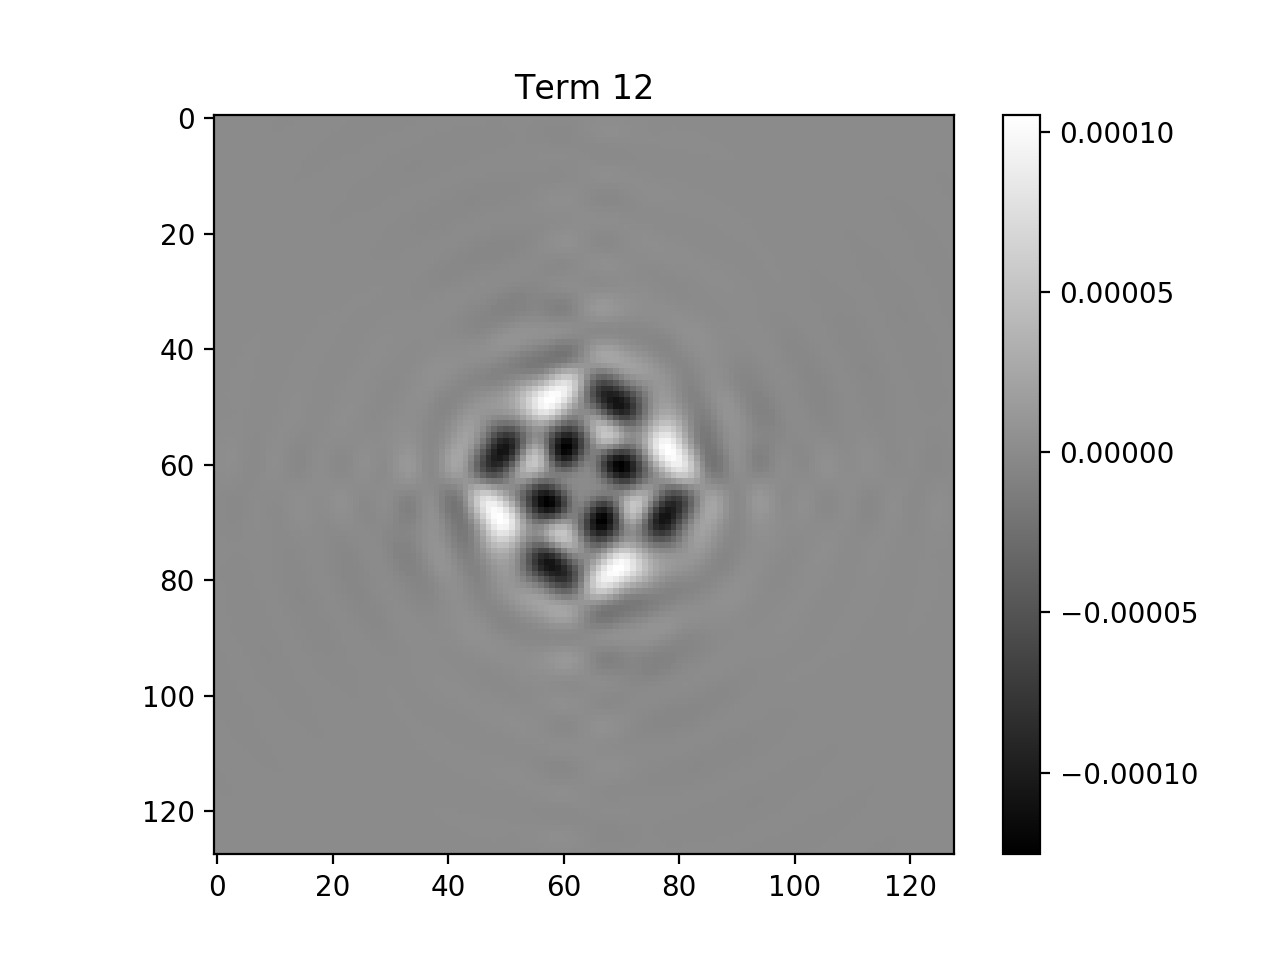

<IPython.core.display.Javascript object>


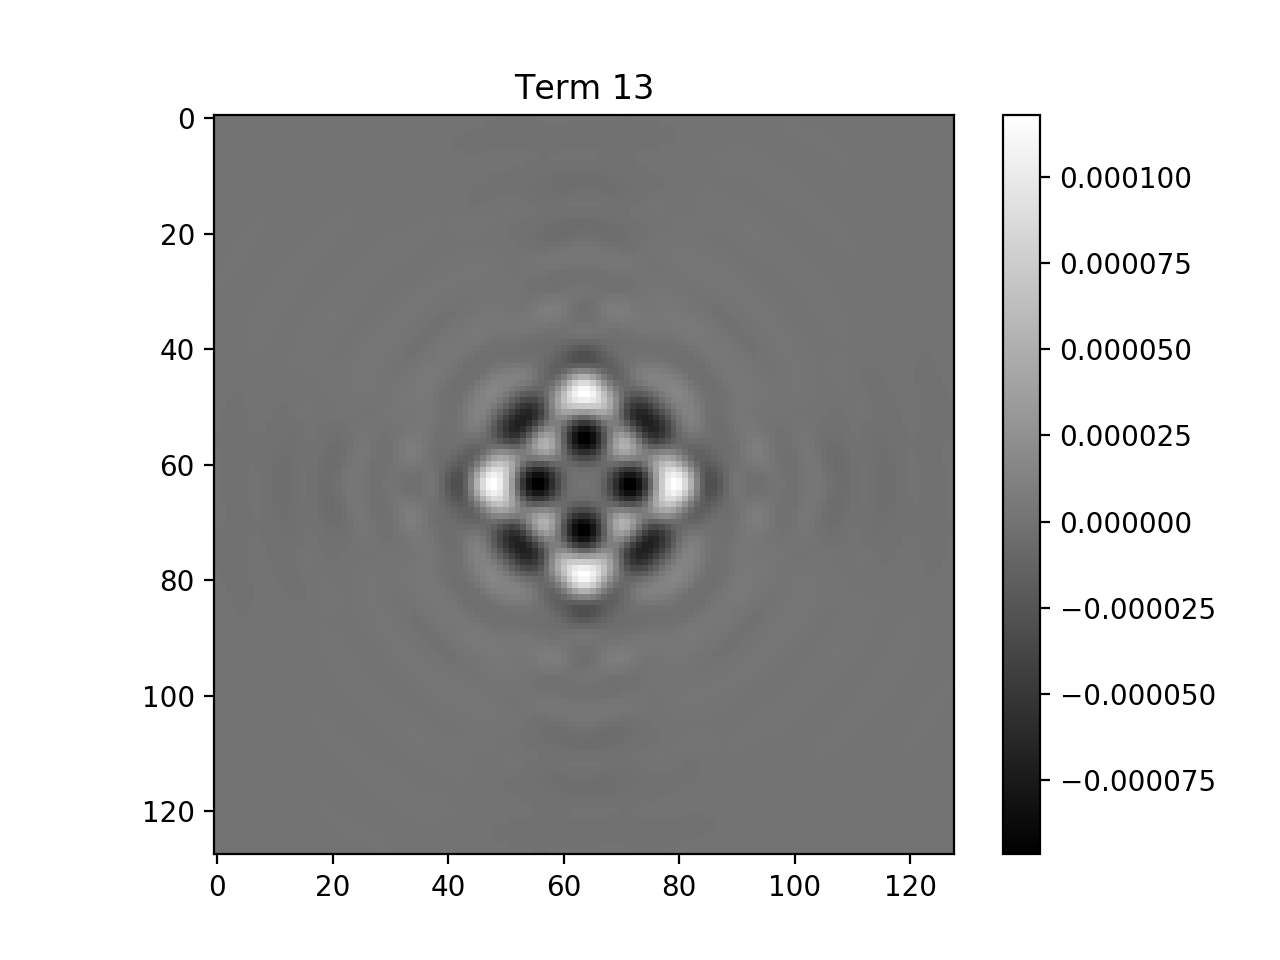

In [97]:
ref = data[:,:,0]
plt.figure()
plt.imshow(ref,cmap='gray')
plt.colorbar()
plt.title('Ref Image')
N = npix_detector
modes = np.zeros((N,N,M))
for i in range(M):
    modes[:,:,i] = data[:,:,i+1]-ref
    plt.figure()
    plt.imshow(modes[:,:,i],cmap='gray')
    plt.colorbar()
    plt.title('Term '+str(i))
    

In [98]:
refdict = {'ref_image':ref}
scipy.io.savemat('ref_image_vortex_128px.mat',refdict)

In [99]:
A = np.zeros((N**2,M))
for i in range(M):
    A[:,i] = modes[:,:,i].ravel()

In [100]:
Apinv = np.linalg.pinv(A)
print(Apinv.shape)

(14, 16384)


In [101]:
testvec = modes[:,:,0].ravel()
print(testvec.shape)

(16384,)


In [102]:
np.dot(Apinv,testvec)

array([ 1.00000000e+00, -4.50092979e-16, -5.55111512e-16,  2.42793524e-17,
       -8.77431266e-16,  6.17995238e-17,  5.34918247e-17, -4.50214952e-17,
       -1.01223825e-16,  1.29670580e-15, -7.97539118e-16, -3.77844457e-17,
        3.47012458e-16, -1.08989423e-16])

In [103]:
max_rms_phase = 100e-9
nEx = 100
step = 2*max_rms_phase/nEx

wfe_array_test = np.zeros((M,nEx))
for i in range(nEx):
    wfe_array_test[:,i] = initial_array
    wfe_array_test[0,i] += -1*max_rms_phase + step*i
print(wfe_array_test[:,:3])
print(wfe_array_test[0,:])


[[-1.0e-07 -9.8e-08 -9.6e-08]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00]]
[-1.00000000e-07 -9.80000000e-08 -9.60000000e-08 -9.40000000e-08
 -9.20000000e-08 -9.00000000e-08 -8.80000000e-08 -8.60000000e-08
 -8.40000000e-08 -8.20000000e-08 -8.00000000e-08 -7.80000000e-08
 -7.60000000e-08 -7.40000000e-08 -7.20000000e-08 -7.00000000e-08
 -6.80000000e-08 -6.60000000e-08 -6.40000000e-08 -6.20000000e-08
 -6.00000000e-08 -5.80000000e-08 -5.60000000e-08 -5.40000000e-08
 -5.20000000e-08 -5.00000000e-08 -4.80000000e-08 -4.60000000e-08
 -4.40000000e-08 -4.20000000e-08 -4.00000000e-08 -3.80000000e-08
 -3.60000000e-08 -3.40000000e-08 -3.20000000e-08 -3.0000000

In [104]:
print(wfe_array_test[:,60])

[2.e-08 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00]


In [84]:
test_data = simulate_multiple_llowfs(wfe_array_test,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defocus)

<IPython.core.display.Javascript object>


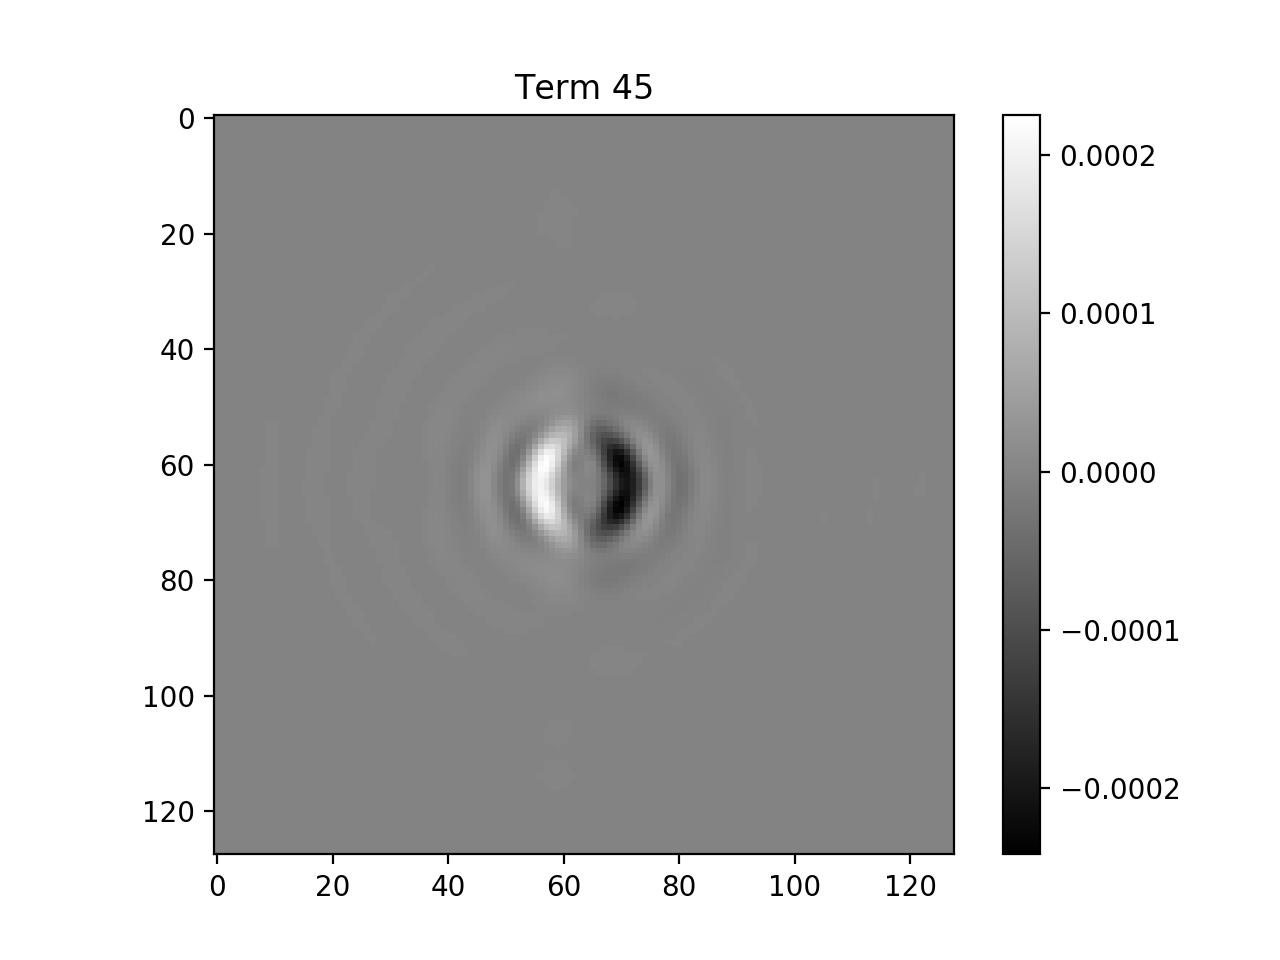

<IPython.core.display.Javascript object>


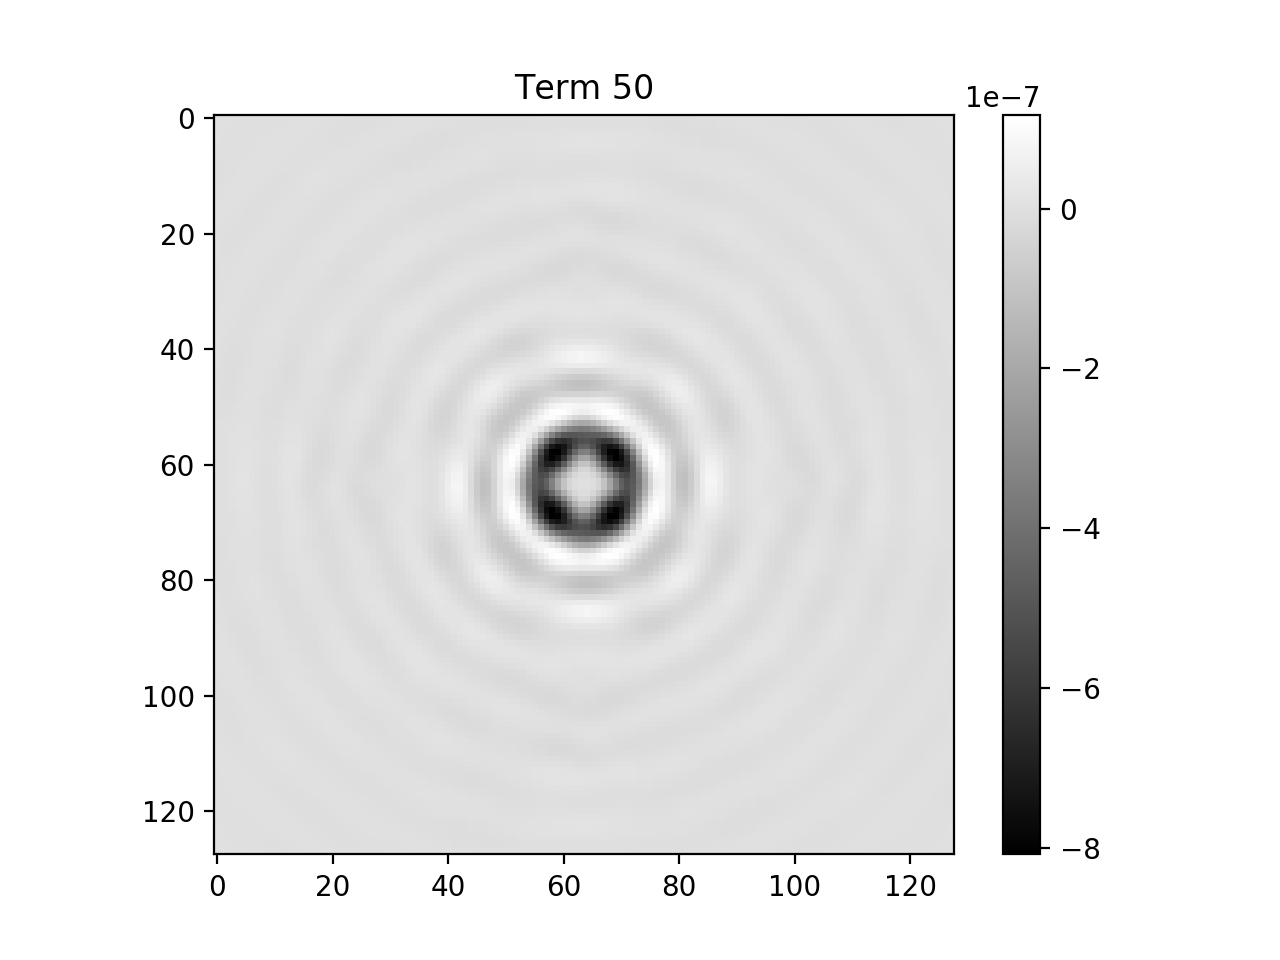

<IPython.core.display.Javascript object>


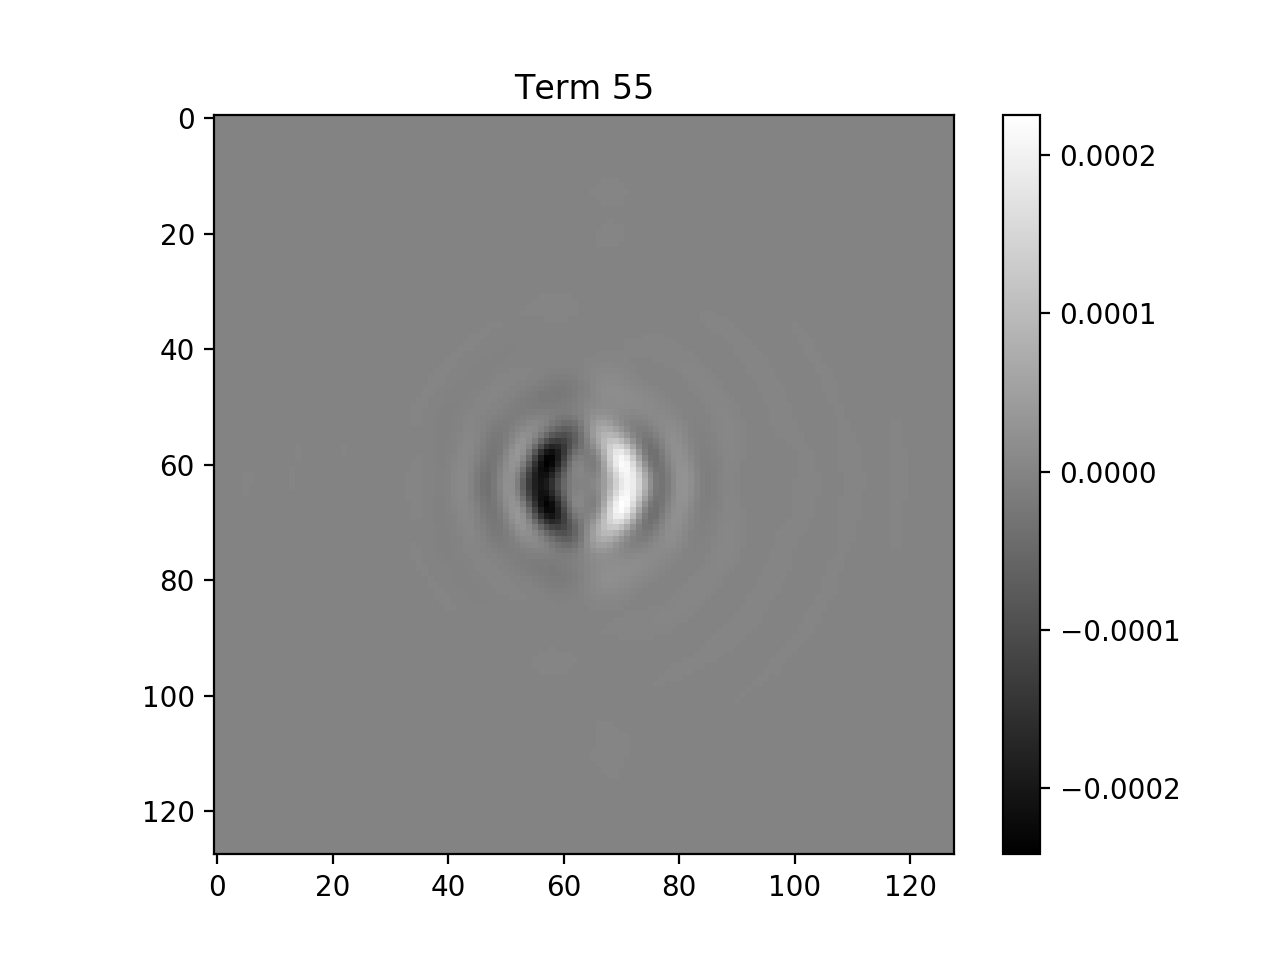

<IPython.core.display.Javascript object>


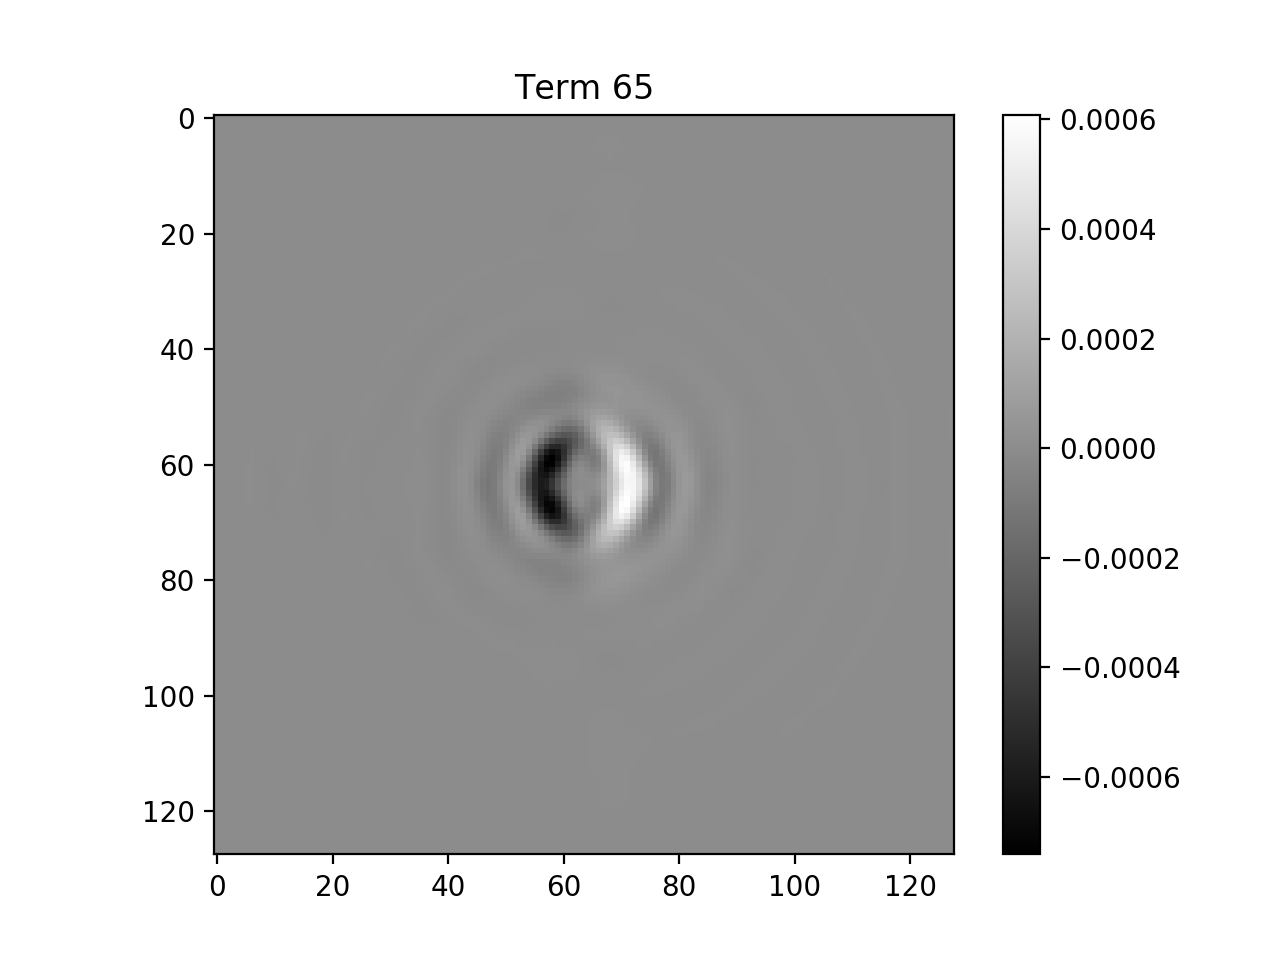

In [105]:
to_plot = [45,50,55,65]
for k in to_plot:
    plt.figure()
    plt.imshow(test_data[:,:,k]-ref,cmap='gray')
    plt.colorbar()
    plt.title('Term '+str(k))

In [106]:
test_results = np.zeros((nEx,M))

for i in range(nEx):
    pixels = (test_data[:,:,i]-ref).ravel()
    calc_coeffs = np.dot(Apinv,pixels)*rms_phase_mode
    test_results[i,:] = calc_coeffs

In [107]:
print(test_results.shape)
print(test_results[60,:])

(100, 14)
[ 1.99810470e-08 -2.32403086e-10 -5.02512274e-11 -4.89600340e-11
  7.87026375e-11 -1.18509528e-09  2.65140758e-10  5.71230142e-12
  4.34910278e-12  8.54311522e-10  2.60974119e-11  3.24700179e-10
 -1.17922981e-11 -3.52011967e-13]


[(0.0, 0.0, 0.502, 1.0), (0.0, 0.26598627808136, 0.2827249433106577, 1.0), (0.0, 0.3874016993464051, 1.0, 1.0), (0.0, 0.930796862745098, 1.0, 1.0), (0.0, 0.9804, 0.5731160158460669, 1.0), (0.14987017543859635, 0.940799477124183, 0.0, 1.0), (0.4537607843137255, 0.9104032258064516, 0.0, 1.0), (0.6967515786278082, 1.0, 0.20299988662131535, 1.0), (1.0, 0.9710620522161504, 0.0, 1.0), (1.0, 0.8066418943533695, 0.021098823529411777, 1.0), (1.0, 0.44038591378263514, 0.021972448979591816, 1.0), (1.0, 0.055951700680272, 0.0, 1.0), (0.9462666666666665, 0.026863261296660175, 1.0, 1.0), (0.7377776686313035, 0.31468245294474795, 0.971711414693382, 1.0), (0.9486490196078431, 0.6636764705882352, 0.9555771241830066, 1.0), (0.9961, 0.9725, 0.9961, 1.0)]


<IPython.core.display.Javascript object>


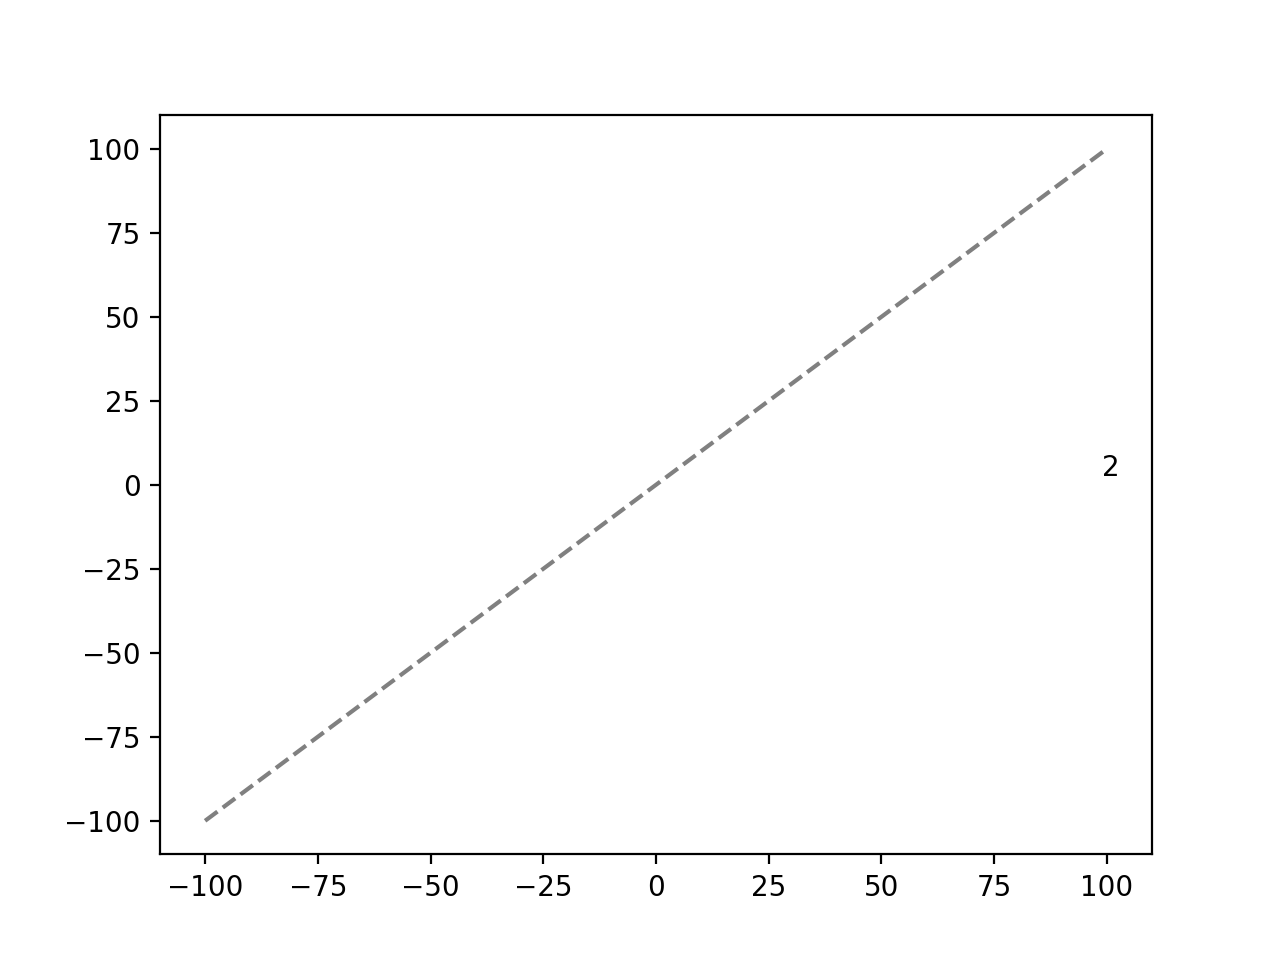

ValueError: x and y must have same first dimension, but have shapes (100,) and (40,)

In [120]:
to_plot = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#colormap = plt.cm.nipy_spectral
colormap = plt.cm.gist_ncar
colorcycle = [colormap(c) for c in np.linspace(0, 1,len(to_plot)+2)]
print(colorcycle)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_prop_cycle(color=colorcycle)
ax1.plot([-100,100],[-100,100],linestyle='--',color='grey')
for i in to_plot:
    ax1.text((wfe_array_test[0,-1]+1e-9)*1e9,(test_results[-1,i])*1e9-5,str(to_plot[i]+2))
    ax1.plot(wfe_array_test[0,:]*1e9,test_results[:,i]*1e9)
ax1.set_xlabel('True Value of Zernike Coeff. 1 (nm)')
ax1.set_ylabel('Recovered Coeff. (nm)')
ax1.set_ylim([-100,100])
#plt.show()

In [116]:
max_rms_phase = 100e-9
nExDefoc = 40
step = 2*max_rms_phase/nExDefoc

wfe_array_defoc_test = np.zeros((M,nExDefoc))
for i in range(nExDefoc):
    wfe_array_defoc_test[2,i] += -1*max_rms_phase + step*i

In [118]:
#plot defocus response with different values of defocus
defocus_radians = np.arange(0,3*np.pi,np.pi/4)
defocus_waves = defocus_radians/(2*np.pi)
nDef = np.size(defocus_waves)

defoc_results = np.zeros((nExDefoc,nDef))

for k,defoc in enumerate(defocus_waves):
    wfe_array = np.zeros((M,M+1))
    for i in range(M):
        wfe_array[i,i+1] = rms_phase_mode
    data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,\
                    coronagraph=coronagraph,pixelscale=detector_pixelscale,\
                    npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defoc)
    ref = data[:,:,0]
    modes = np.zeros((N,N,M))
    for i in range(M):
        modes[:,:,i] = data[:,:,i+1]-ref
    A = np.zeros((N**2,M))
    for i in range(M):
        A[:,i] = modes[:,:,i].ravel()
    Apinv = np.linalg.pinv(A)
    defoc_test_data = simulate_multiple_llowfs(wfe_array_defoc_test,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defoc)
    test_results = np.zeros((nExDefoc,M))
    for i in range(nExDefoc):
        pixels = (defoc_test_data[:,:,i]-ref).ravel()
        calc_coeffs = np.dot(Apinv,pixels)*rms_phase_mode
        test_results[i,:] = calc_coeffs
    
    defoc_results[:,k] = test_results[:,2]


In [70]:
print(defoc_results)

[[-5.00548501e-07 -4.40878123e-07  6.47616130e-08  6.02105031e-07
   5.83104773e-07  9.59156255e-08]
 [-4.82536594e-07 -4.26276170e-07  5.33239901e-08  5.63403882e-07
   5.45607532e-07  8.36357701e-08]
 [-4.62139663e-07 -4.09390776e-07  4.27108166e-08  5.23907101e-07
   5.07328610e-07  7.19483402e-08]
 [-4.39506589e-07 -3.90353200e-07  3.29697907e-08  4.83852783e-07
   4.68500223e-07  6.09161206e-08]
 [-4.14828907e-07 -3.69335195e-07  2.41363554e-08  4.43498234e-07
   4.29373496e-07  5.05938587e-08]
 [-3.88338312e-07 -3.46546585e-07  1.62340934e-08  4.03118131e-07
   3.90216636e-07  4.10283015e-08]
 [-3.60303361e-07 -3.22232083e-07  9.27534386e-09  3.63002292e-07
   3.51312727e-07  3.22583732e-08]
 [-3.31025427e-07 -2.96667411e-07  3.26201571e-09  3.23453085e-07
   3.12957156e-07  2.43154756e-08]
 [-3.00833995e-07 -2.70154790e-07 -1.81343488e-09  2.84782479e-07
   2.75454697e-07  1.72238913e-08]
 [-2.70081364e-07 -2.43017897e-07 -5.96689463e-09  2.47308778e-07
   2.39116280e-07  1.1001

<IPython.core.display.Javascript object>


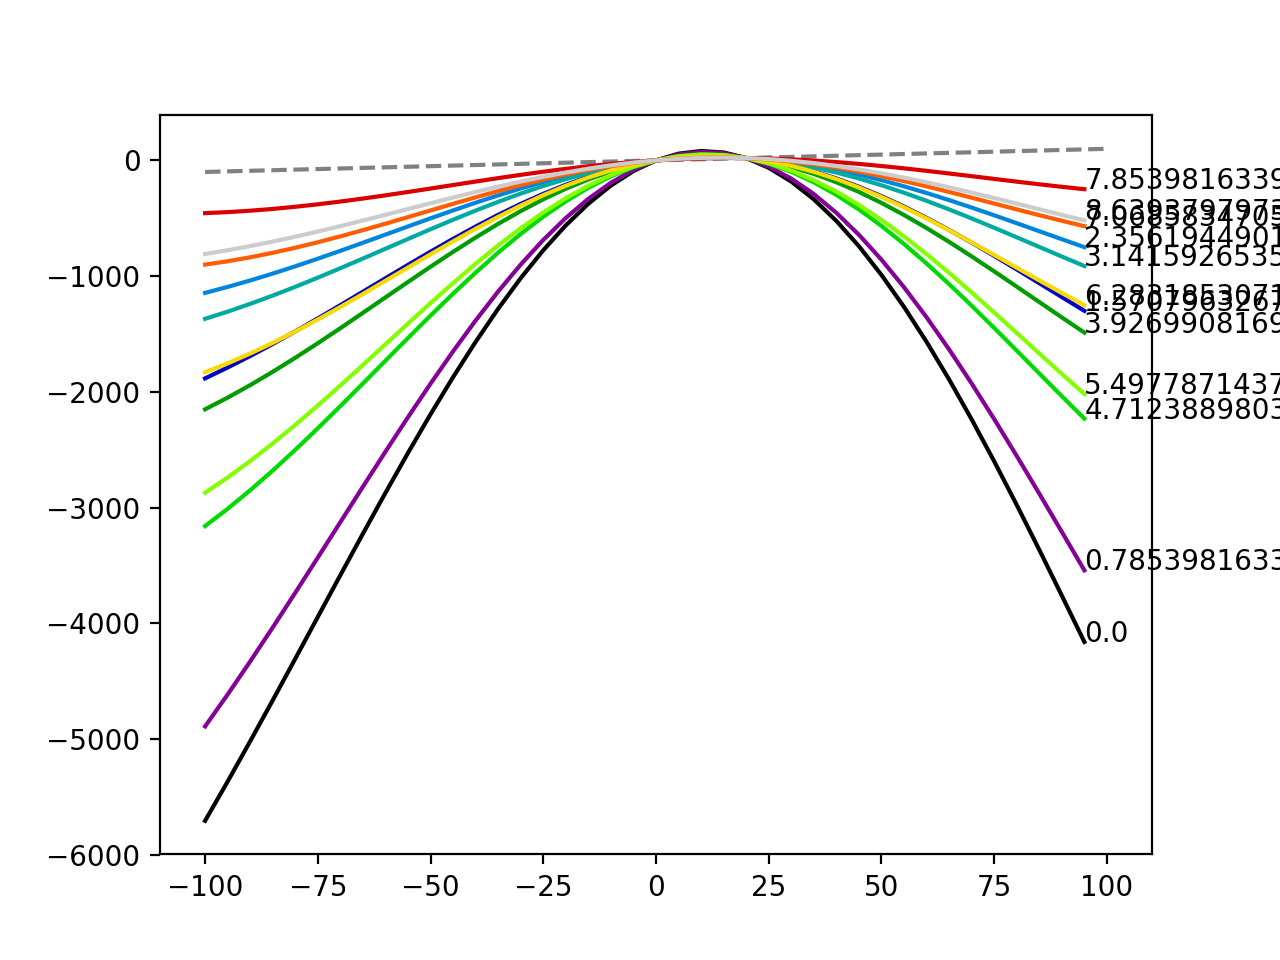

In [119]:
colormap = plt.cm.nipy_spectral
#nipy_spectral
colorcycle = [colormap(c) for c in np.linspace(0, 1,nDef)]
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_prop_cycle(color=colorcycle)
ax1.plot([-100,100],[-100,100],linestyle='--',color='grey')
for i in range(nDef):
    ax1.plot(wfe_array_defoc_test[2,:]*1e9,defoc_results[:,i]*1e9)
    ax1.text(wfe_array_defoc_test[2,-1]*1e9,defoc_results[-1,i]*1e9,str(defocus_radians[i]))

In [16]:
file = 'vortex_15_individual_400st_100nm_128px.hdf5'
#file = 'fqpm_50nm_256px_individual_zernikes.hdf5'
with h5py.File(file, 'r') as hf:
    coeffs = np.array(hf.get('zernike_coeffs'))
    images = np.array(hf.get('images'))
print(coeffs.shape)
print(images.shape)

(14, 5600)
(128, 128, 5600)


In [17]:
print(coeffs[:,:3])

[[-1.00000000e-07 -9.94987469e-08 -9.89974937e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [18]:
K = 400
coeffs_sep = np.zeros((M,K,M))

In [19]:
for i in range(M):
    coeffs_sep[:,:,i] = coeffs[:,i*K:(i+1)*K]

In [20]:
coeffs_sep[:,:3,0]

array([[-1.00000000e-07, -9.94987469e-08, -9.89974937e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [21]:
rec_coeffs = np.zeros(coeffs_sep.shape)
for i in range(M): #loop over coefficients
    for j in range(K): #loop over examples
        vec = np.reshape(images[:,:,i*K+j]-ref,(-1,)) 
        rec_coeffs[:,j,i] = np.dot(Apinv,vec)

In [22]:
print(rec_coeffs[:,:3,0])

[[-0.56346471 -0.5664608  -0.56942452]
 [ 0.15612757  0.15554897  0.15496931]
 [-9.28784349 -9.27681367 -9.26502531]
 [ 1.18506499  1.18317945  1.1812155 ]
 [-0.0840005  -0.08505118 -0.08608436]
 [ 2.62872786  2.62695941  2.62500876]
 [-0.4910304  -0.48960577 -0.48818735]
 [ 0.12442558  0.12328297  0.12213846]
 [ 0.19675897  0.19529592  0.19382289]
 [ 8.52978711  8.51573328  8.50105544]
 [ 1.1107824   1.10944435  1.10801497]
 [-0.49442182 -0.49725209 -0.50001803]
 [ 0.0798297   0.07966254  0.07949171]
 [ 0.24569191  0.24504753  0.24439216]]


/Users/gregoryallan/repos/coronagraph-NN-data-gen/nn-gen-venv/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


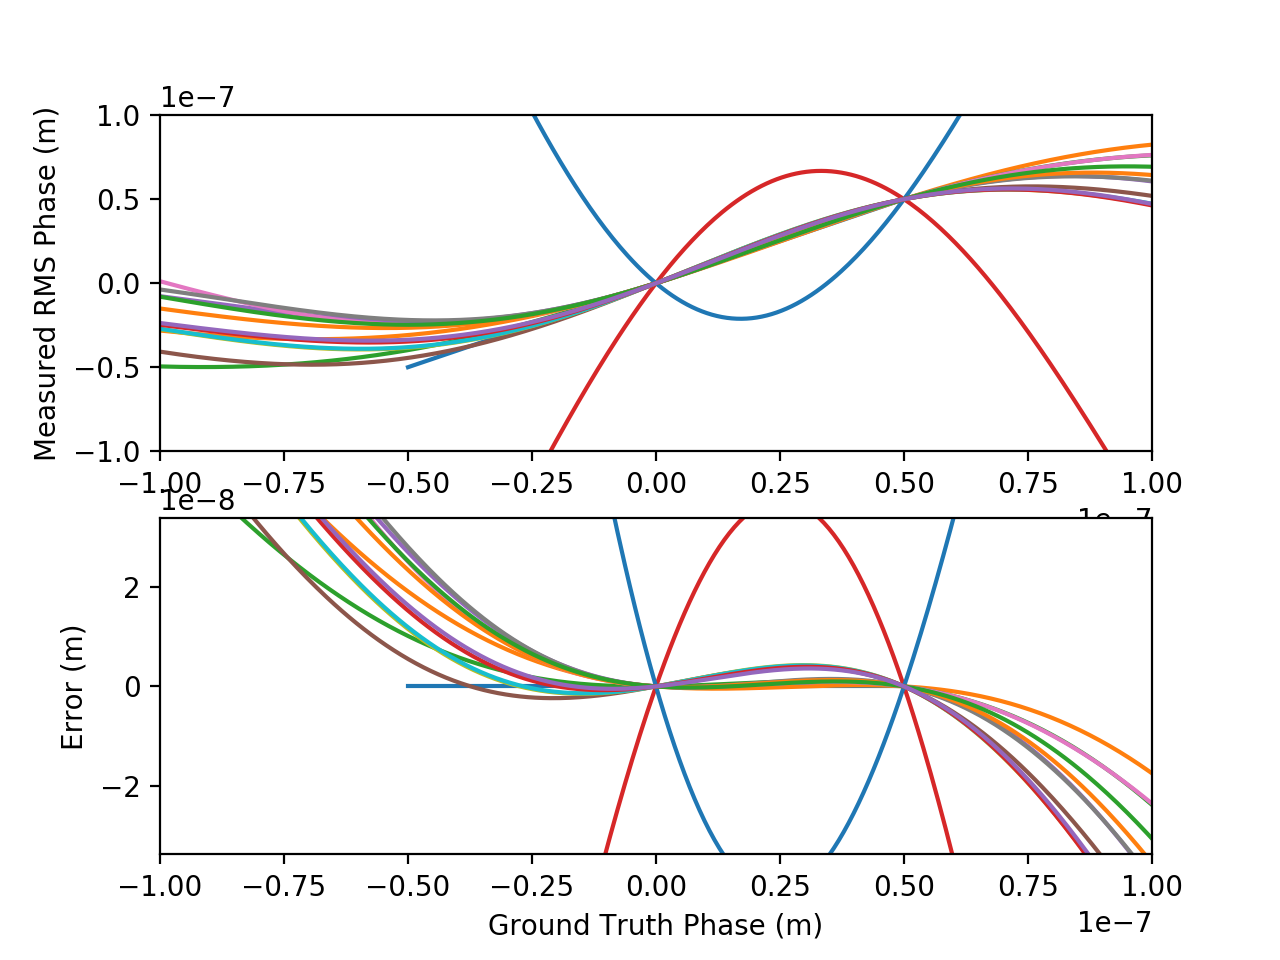

In [23]:
fig,ax = plt.subplots(2,1)
line1 = np.arange(-5e-8,5e-8,1e-9)
line0 = np.zeros(line1.shape)
ax[0].plot(line1,line1)
ax[1].plot(line1,line0)
for i in range(M):
#for i in [2,1,]:
    ax[0].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase_mode)
    #ax[0].axis('equal')
    ax[0].set_xlim([-100e-9,100e-9])
    ax[0].set_ylim([-100e-9,100e-9])
    ax[0].set_ylabel('Measured RMS Phase (m)')
    #ax[0].legend(['None','1','2','3','4','5','6'])
    ax[1].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase_mode-coeffs_sep[i,:,i])
    ax[1].axis('equal')
    ax[1].set_xlim([-100e-9,100e-9])
    ax[1].set_ylim([-10e-9,10e-9])
    ax[1].set_ylabel('Error (m)')
    ax[1].set_xlabel('Ground Truth Phase (m)')

In [24]:
truth = np.zeros((K,M))
reconstruction = np.zeros((K,M))
for i in range (M):
    truth[:,i] = coeffs_sep[i,:,i]
    reconstruction[:,i] = rec_coeffs[i,:,i]
    
mat_out = {
    'truth':truth,
    'reconstruction':reconstruction
}

scipy.io.savemat('linear_llowfs',mat_out)

<IPython.core.display.Javascript object>


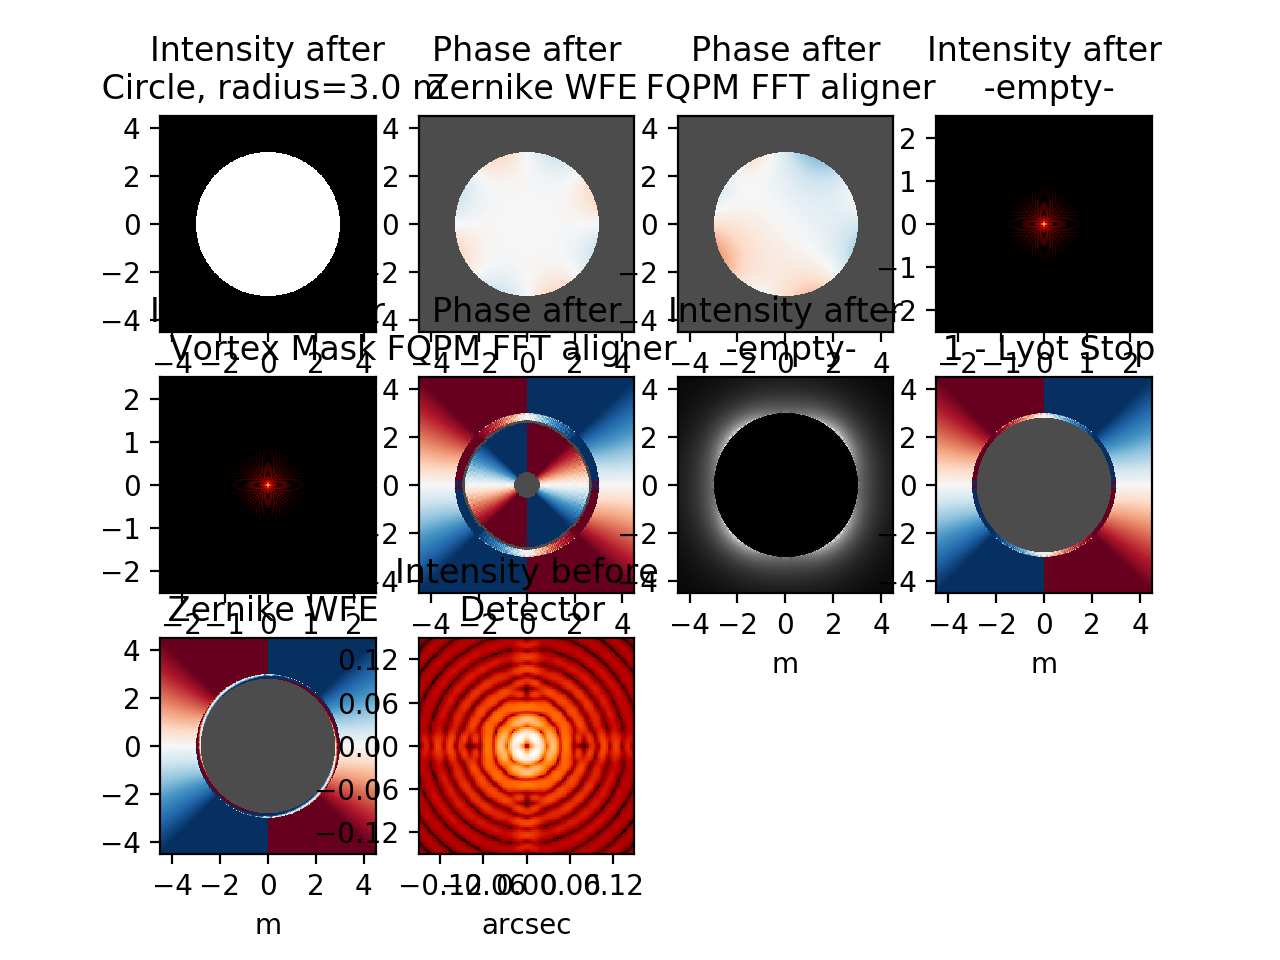

<IPython.core.display.Javascript object>


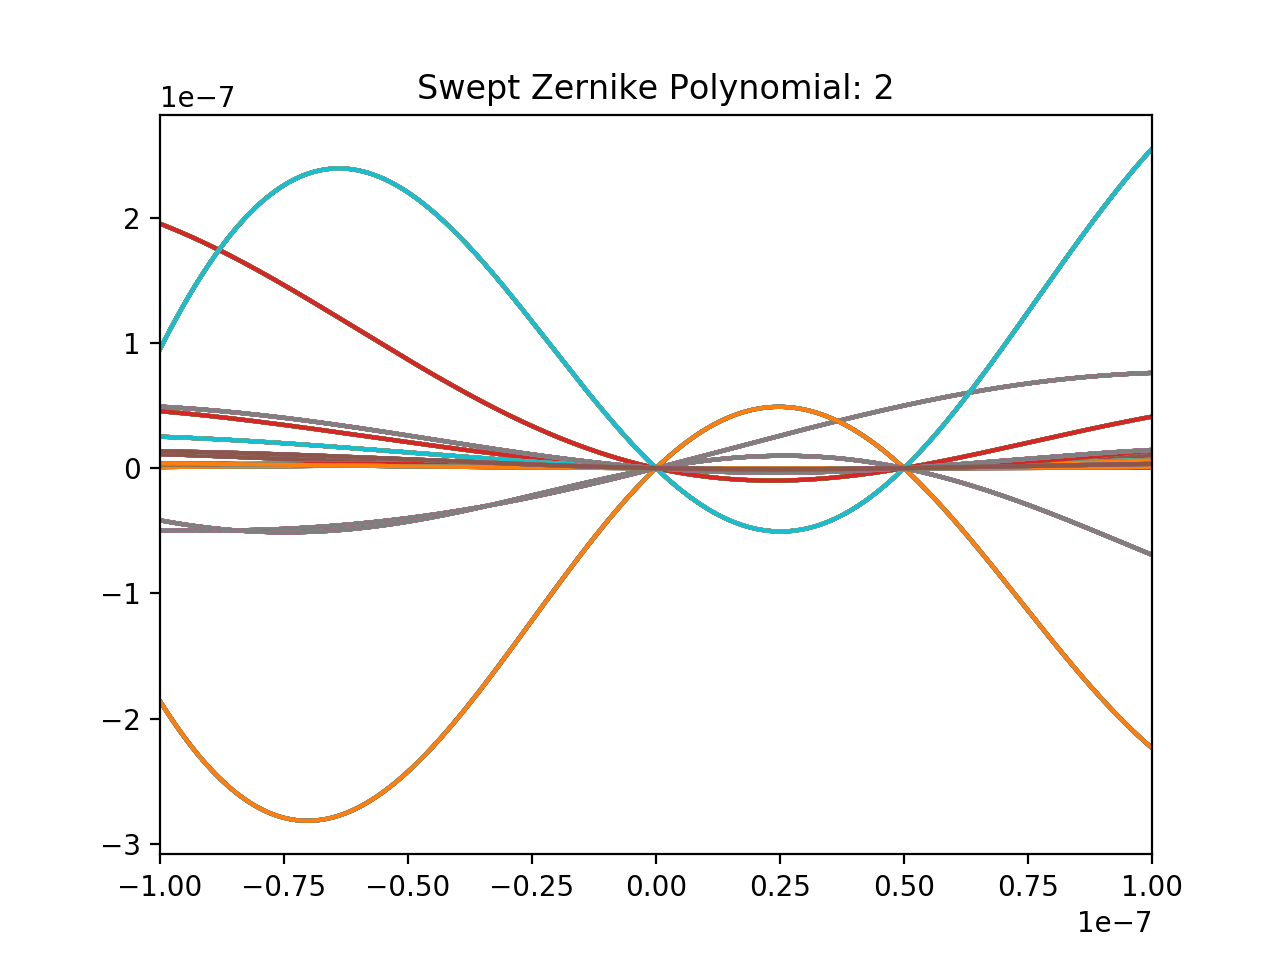

<IPython.core.display.Javascript object>


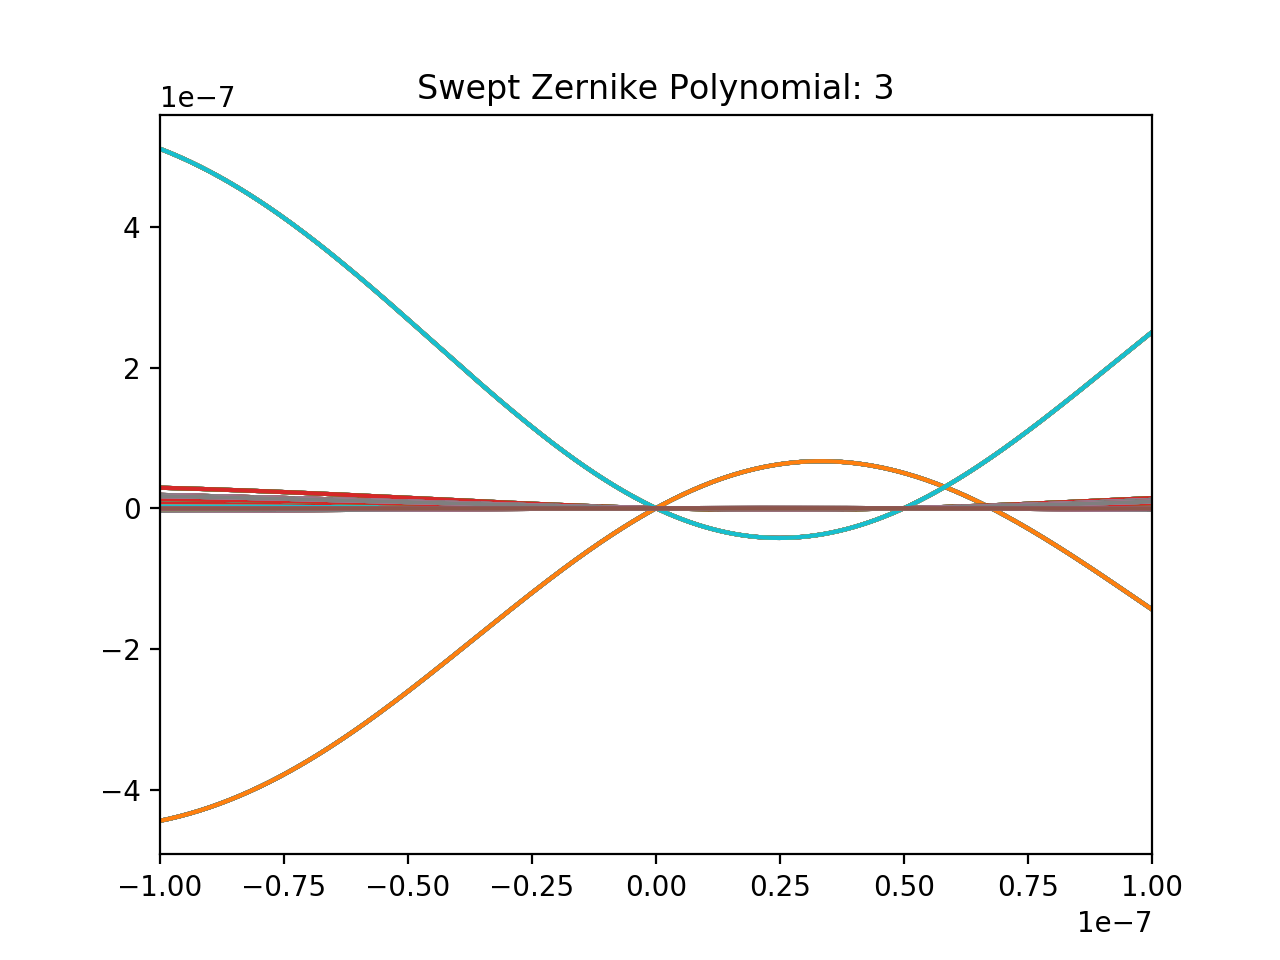

<IPython.core.display.Javascript object>


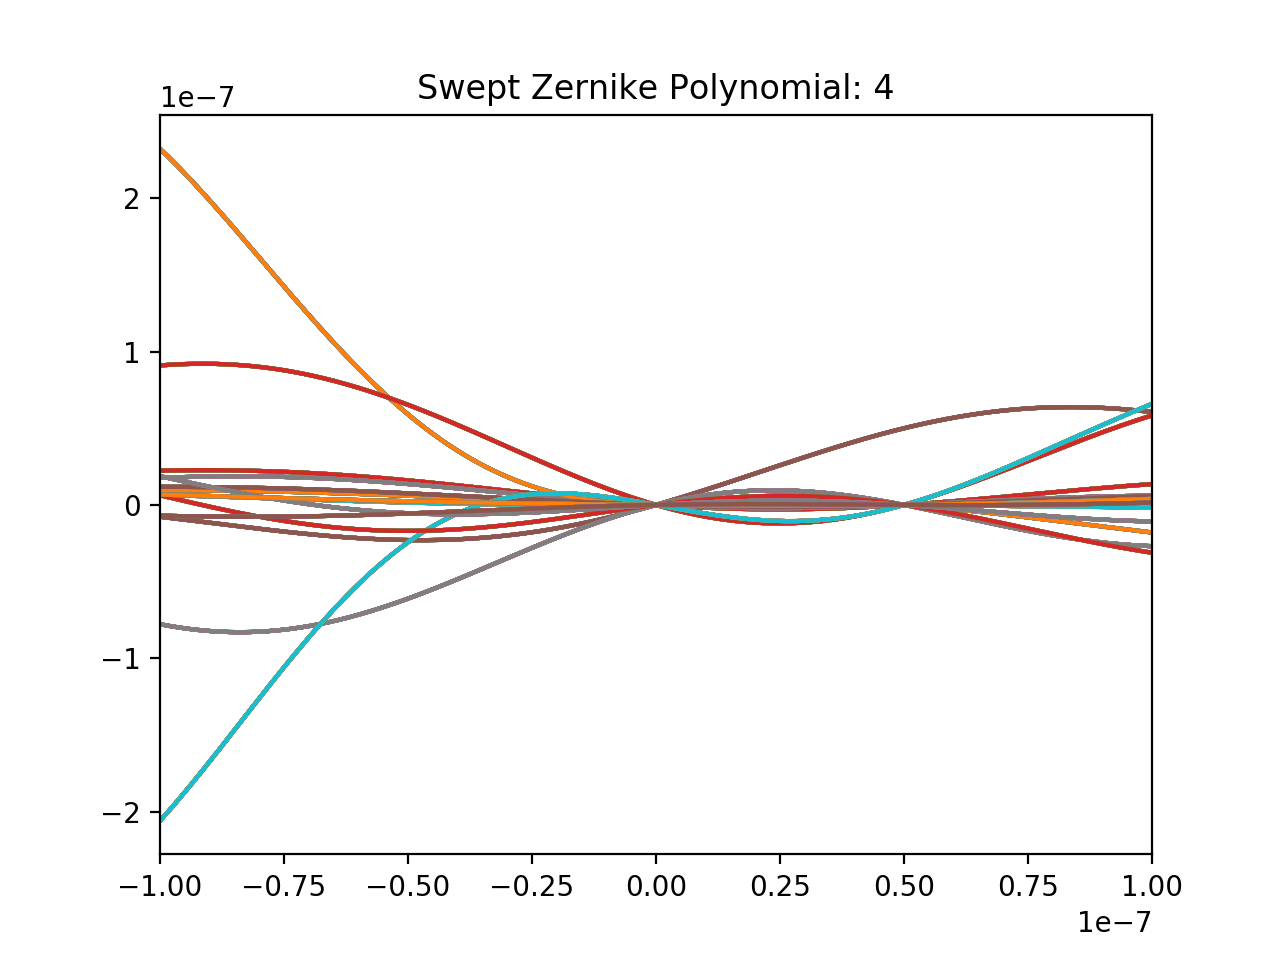

<IPython.core.display.Javascript object>


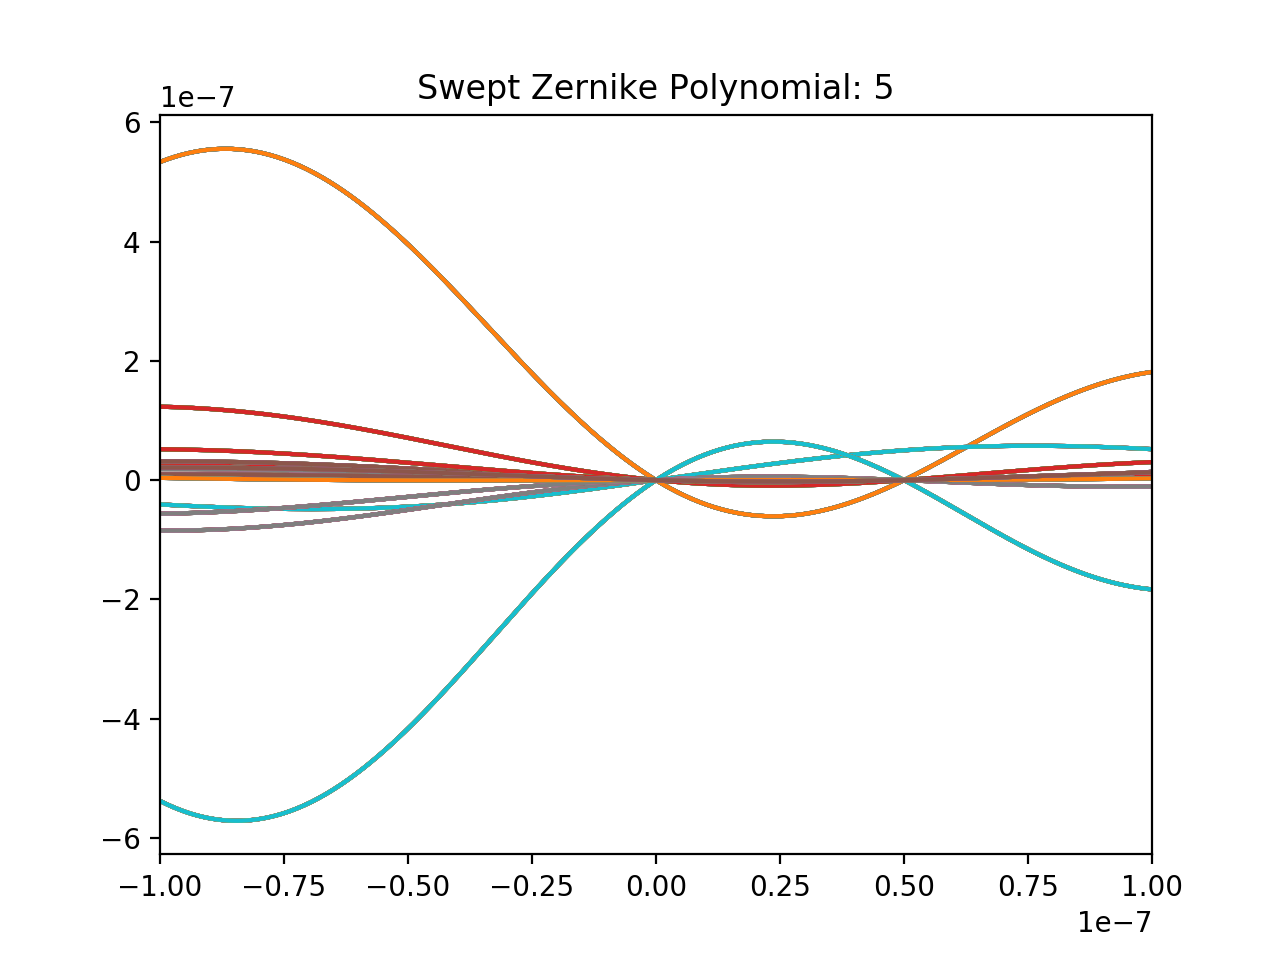

<IPython.core.display.Javascript object>


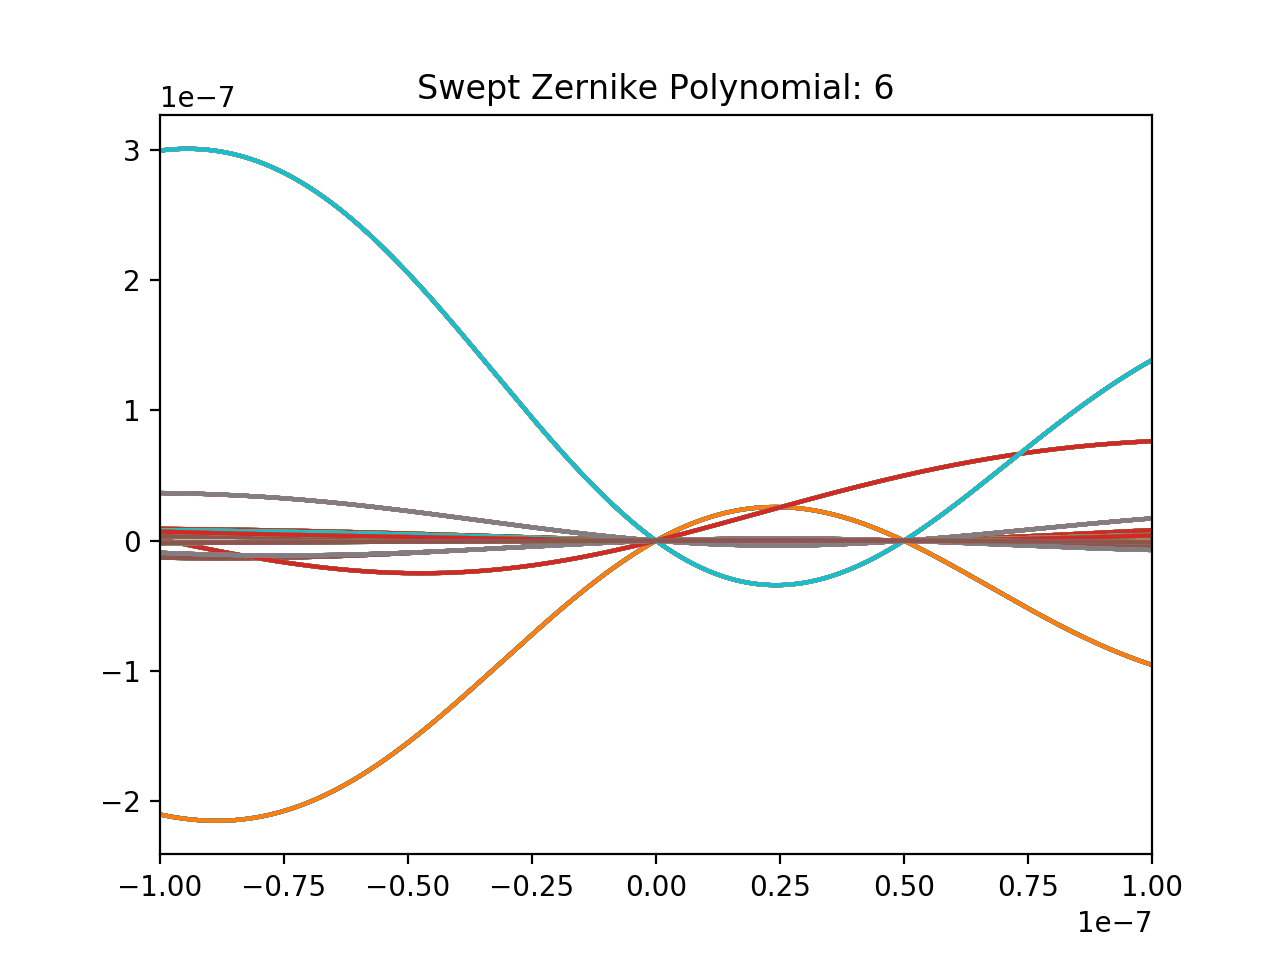

<IPython.core.display.Javascript object>


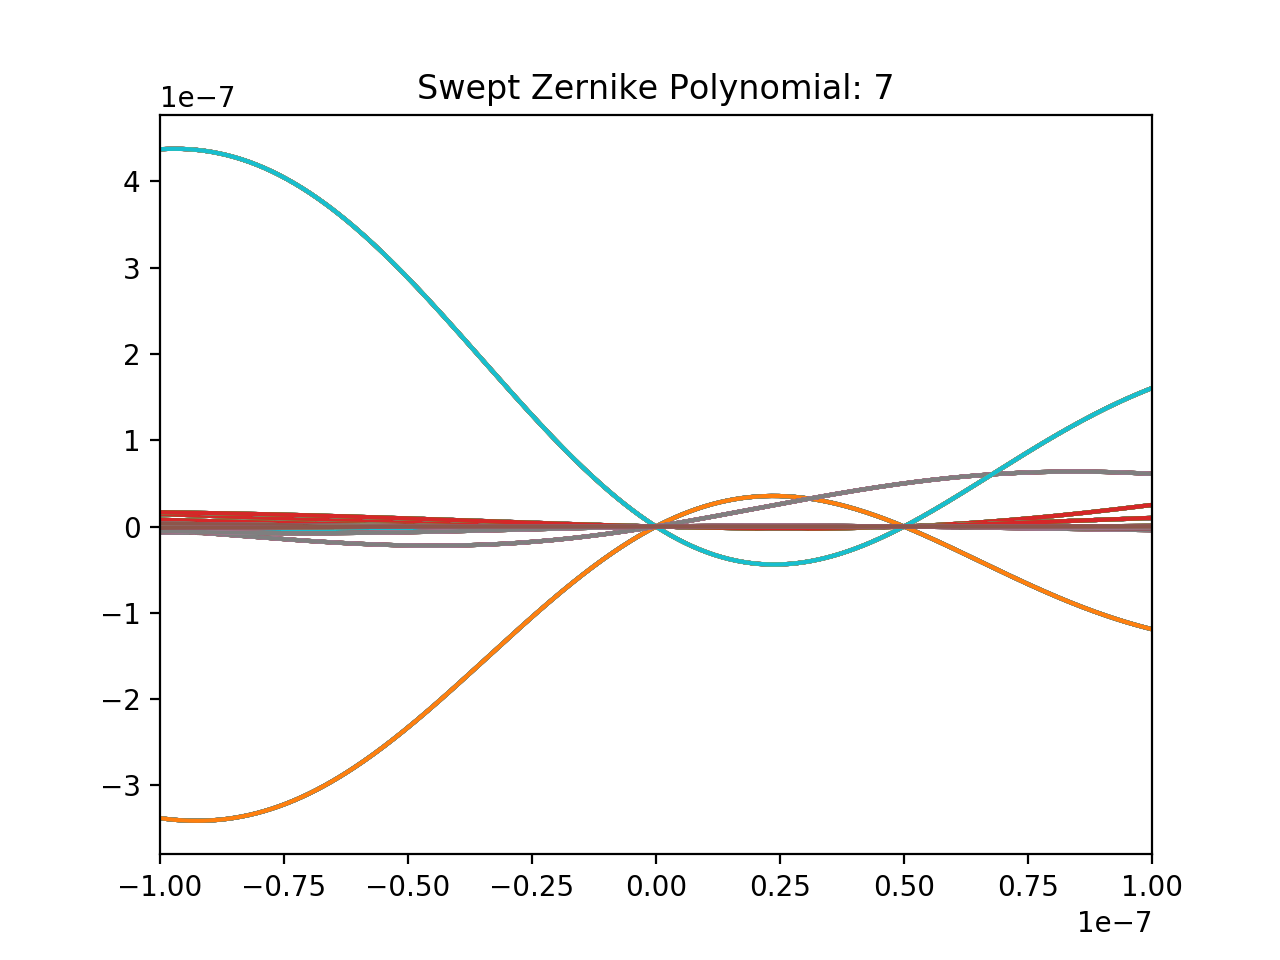

<IPython.core.display.Javascript object>


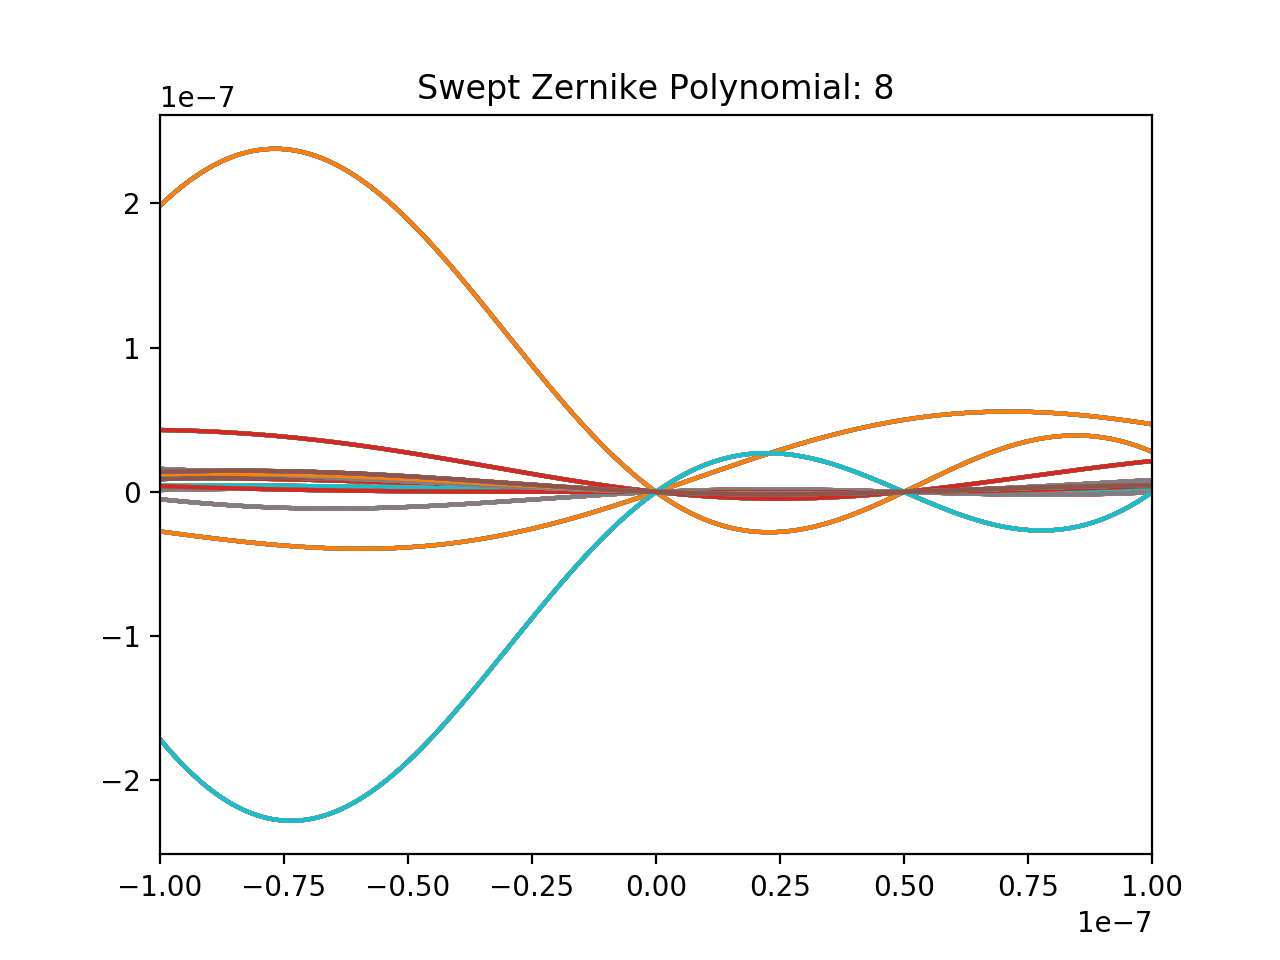

<IPython.core.display.Javascript object>


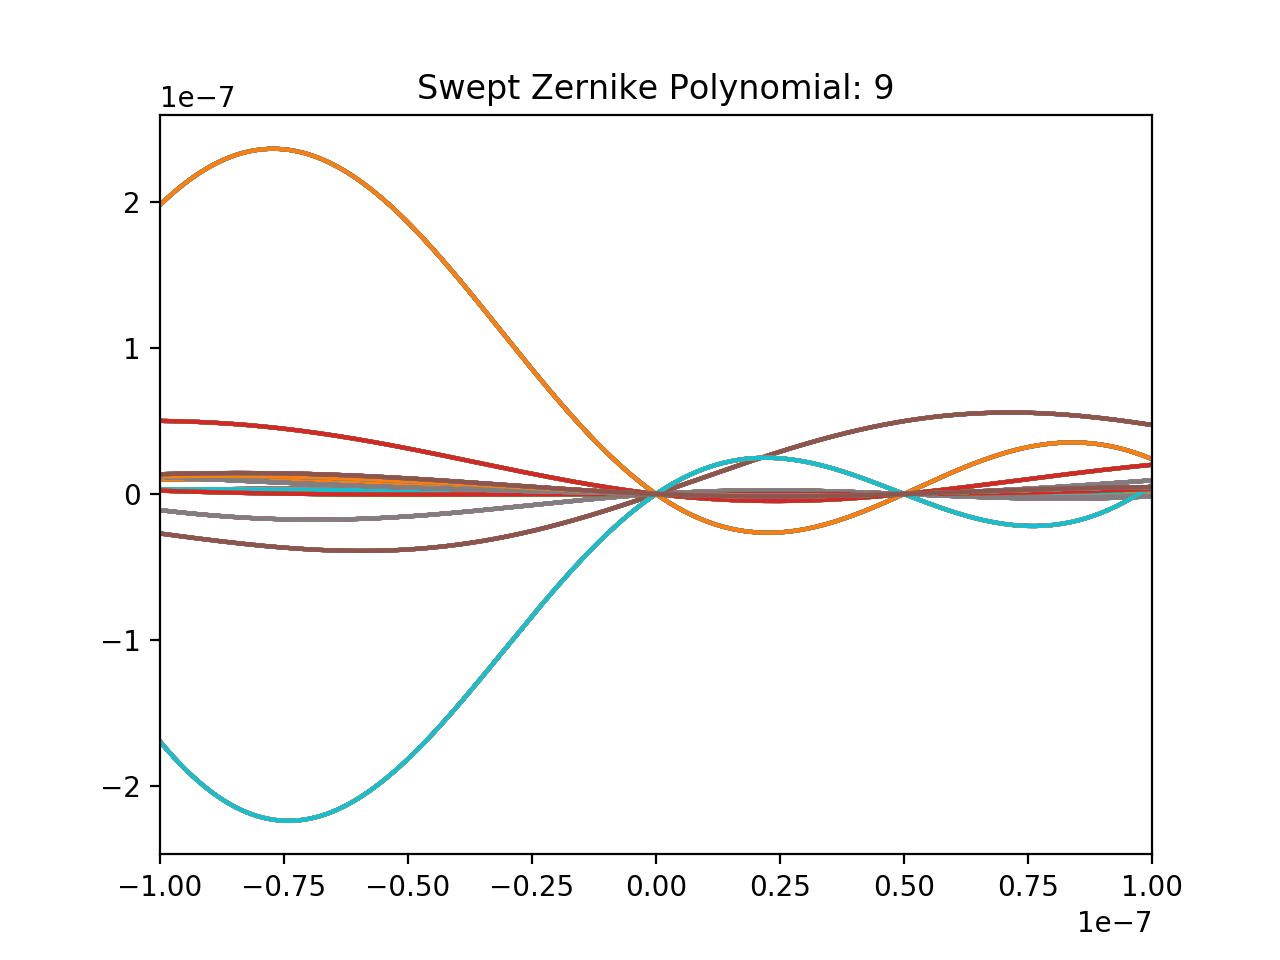

<IPython.core.display.Javascript object>


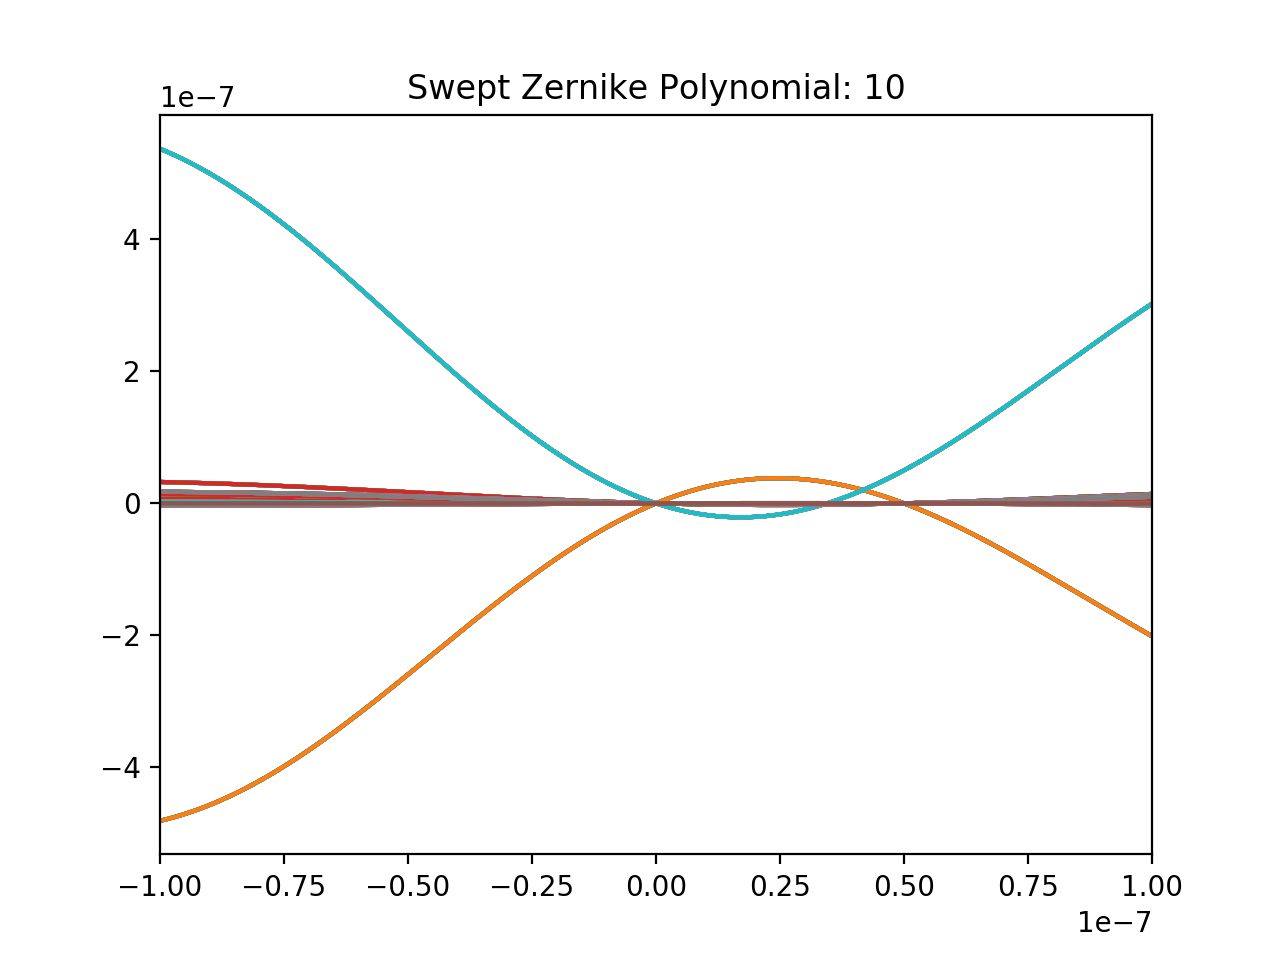

<IPython.core.display.Javascript object>


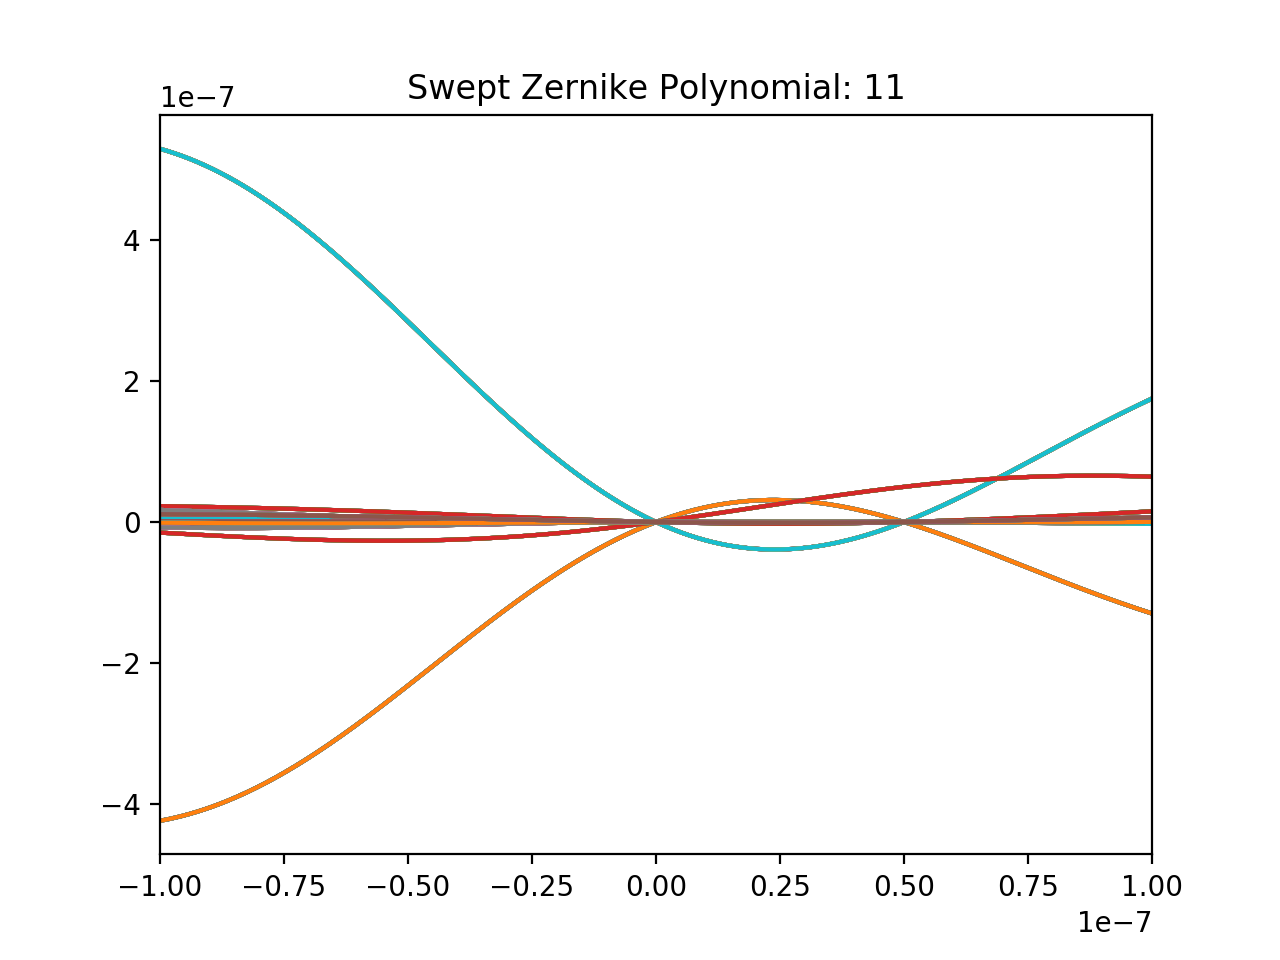

<IPython.core.display.Javascript object>


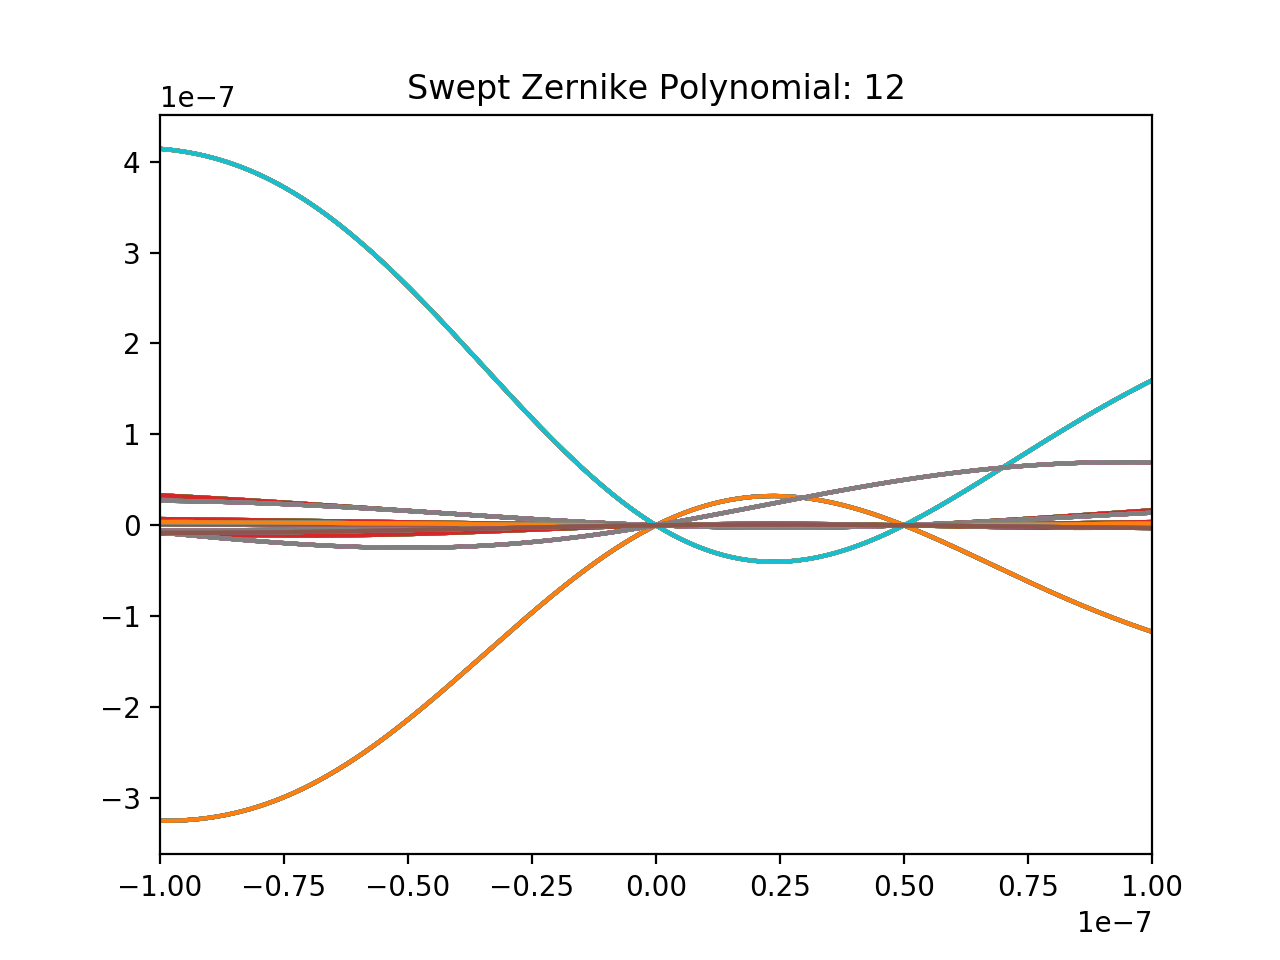

<IPython.core.display.Javascript object>


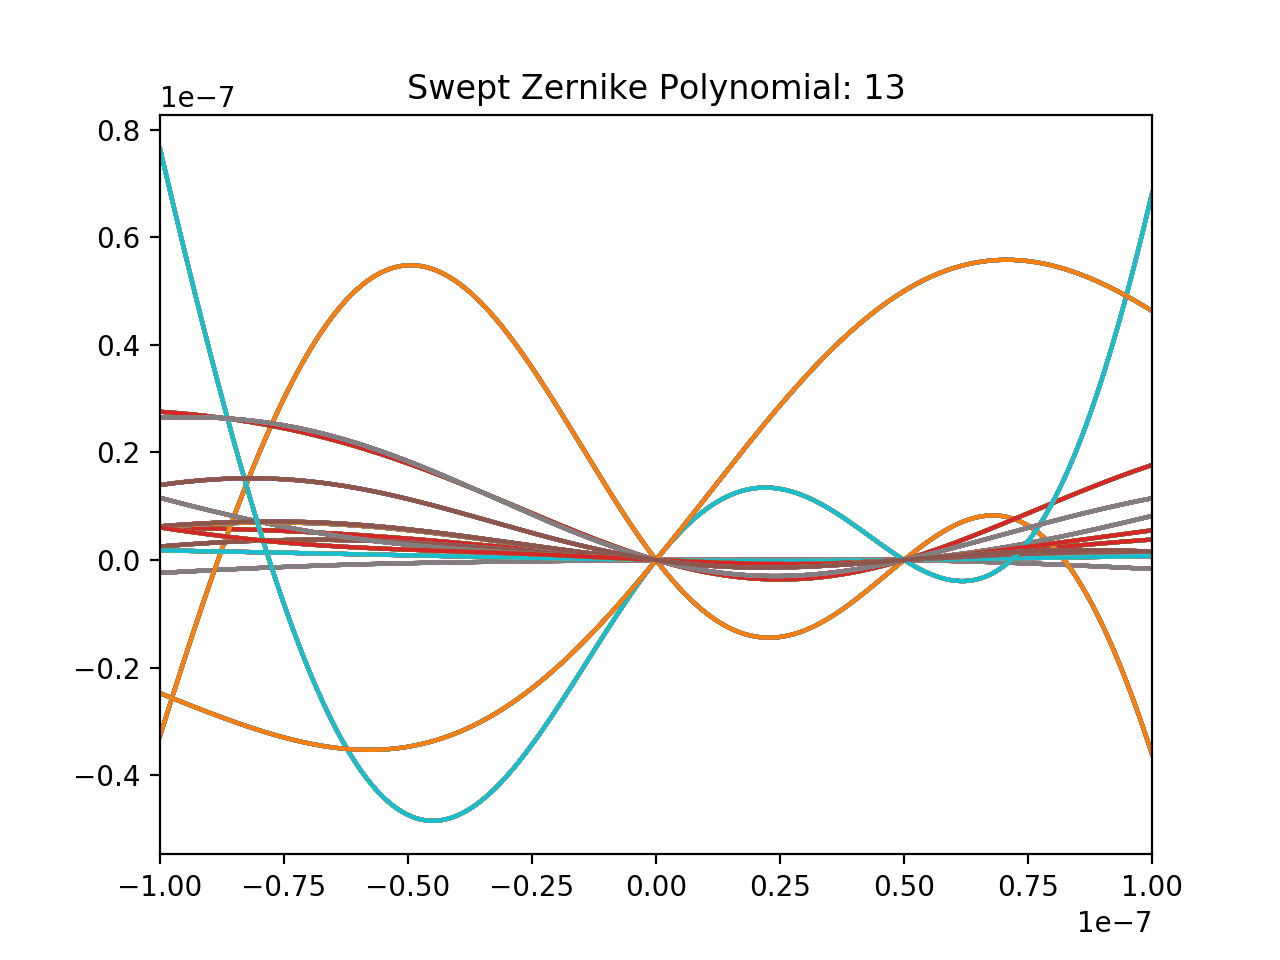

<IPython.core.display.Javascript object>


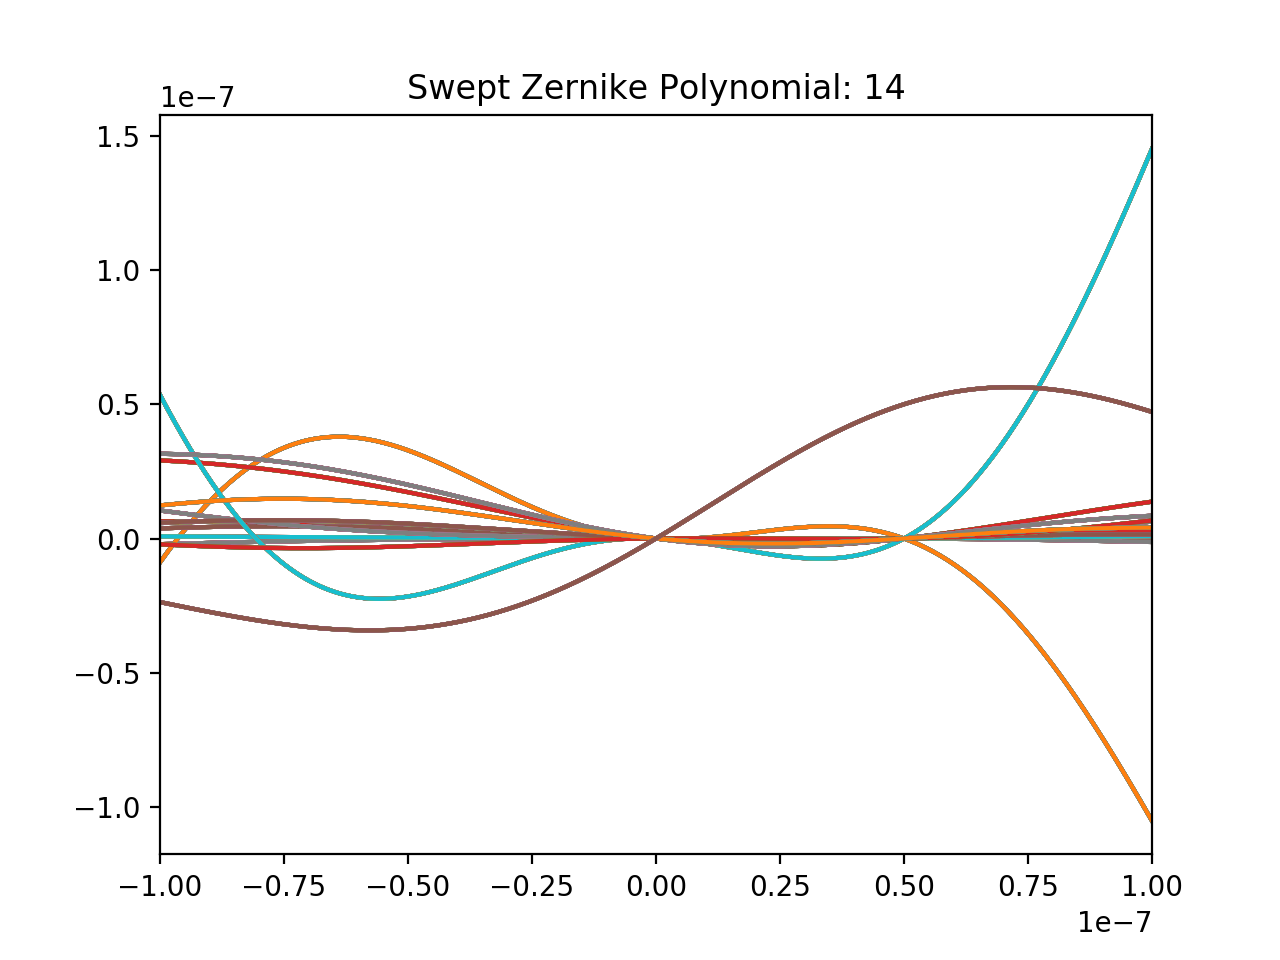

In [25]:
for i in range(M): #loop over coefficients
    plt.figure()
    #for j in range(K): #loop over examples
    truth[:,i] = coeffs_sep[i,:,i]
    for k in range(M): 
        resultsvec = rec_coeffs[k,:,i]*rms_phase_mode
        plt.plot(truth,resultsvec)
        plt.xlim([-100.0*1e-9,100.0*1e-9])
    plt.title('Swept Zernike Polynomial: '+str(i+1))
        #plt.ylim([-50,50])